# Predicting Corporate Distress for Small and Medium-sized Enterprises (SMEs) in Hong Kong, Singapore, and South Korea.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functools as ft

### Description of datasets:
- Collected 26 Excel documents from Factset
    - Target: 
        - 'Distress' or 'Non-distress' (represented by Equity)
    - Predictors: 
        - Country, 
        - Industry, and
        - 25 Financial Ratios that are categorised in 5 groups, namely: Activity, Leverage, Liquidity, Profitability, and Valuation
- Time period: 2011 to 2021

# Part 1: Import Datasets

In [2]:
# Read in datasets

filepath = './files/datasets'

# Equity Ratios
equity = pd.read_excel(f'{filepath}/Equity.xlsx')

# Activity Ratios
receivables_liabilities = pd.read_excel(f'{filepath}/Activity - Account Receivables-to-Liabilities.xlsx')
payables_sales = pd.read_excel(f'{filepath}/Activity - Account Payables-to-Sales.xlsx')
asset_turnover = pd.read_excel(f'{filepath}/Activity - Asset Turnover.xlsx')
inventory_turnover = pd.read_excel(f'{filepath}/Activity - Inventory Turnover.xlsx')
sales_receivables = pd.read_excel(f'{filepath}/Activity - Sales-to-Account Receivables.xlsx')

# Leverage Ratios
debt_assets = pd.read_excel(f'{filepath}/Leverage - Debt-to-Asset.xlsx')
debt_ebitda = pd.read_excel(f'{filepath}/Leverage - Debt-to-EBITDA.xlsx')
ebitda_interest = pd.read_excel(f'{filepath}/Leverage - EBITDA-to-Interest Expense.xlsx')
longtermdebt_assets = pd.read_excel(f'{filepath}/Leverage - Long Term Debt-to-Assets.xlsx')
timesinterestearned = pd.read_excel(f'{filepath}/Leverage - Times Interest Earned.xlsx')

# Liquidity Ratios
cashconversioncycle = pd.read_excel(f'{filepath}/Liquidity - Cash Conversion Cycle.xlsx')
cash_sales = pd.read_excel(f'{filepath}/Liquidity - Cash Flow-to-Sales.xlsx')
cash = pd.read_excel(f'{filepath}/Liquidity - Cash Ratio.xlsx')
current = pd.read_excel(f'{filepath}/Liquidity - Current Ratio.xlsx')
wc_assets = pd.read_excel(f'{filepath}/Liquidity - Working Capital over Total Assets.xlsx')

# Profitability Ratios
ebitda_assets = pd.read_excel(f'{filepath}/Profitability - EBITDA-to-Assets.xlsx')
ebit_assets = pd.read_excel(f'{filepath}/Profitability - EBIT-to-Assets.xlsx')
operating_margin = pd.read_excel(f'{filepath}/Profitability - Operating Margin.xlsx')
profit_margin = pd.read_excel(f'{filepath}/Profitability - Profit Margin.xlsx')
roa = pd.read_excel(f'{filepath}/Profitability - Return on Assets.xlsx')

# Valuation Ratios
dividend_yield = pd.read_excel(f'{filepath}/Valuation - Dividend Yield Ratio.xlsx')
marketcap_debt = pd.read_excel(f'{filepath}/Valuation - Market Capitalisation-to-Debt.xlsx')
price_book = pd.read_excel(f'{filepath}/Valuation - Price-to-Book.xlsx')
price_earnings = pd.read_excel(f'{filepath}/Valuation - Price-to-Earnings.xlsx')
price_sales = pd.read_excel(f'{filepath}/Valuation - Price-to-Sales.xlsx')

In [4]:
# Create a list of dataframes
list_of_datasets = [equity,
                    receivables_liabilities, payables_sales, asset_turnover, inventory_turnover, sales_receivables, 
                    debt_assets, debt_ebitda, ebitda_interest, longtermdebt_assets, timesinterestearned, 
                    cashconversioncycle, cash_sales, cash, current, wc_assets, 
                    ebitda_assets, ebit_assets, operating_margin, profit_margin, roa,
                    dividend_yield, marketcap_debt, price_book, price_earnings, price_sales]

<br>

# Part 2: Data Pre-processing

## 2A) Filtering Relevant Rows

In [5]:
# Check dimensions for each dataset
# Each dataset comprises of 38,165 rows (Equity has 17 cols; Financial ratios has 13 cols)
for df in list_of_datasets:
    print(df.shape)

(38165, 17)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)
(38165, 13)


In [6]:
# Check dataframe format for one of the datasets
# Detected empty rows (i.e., index 0 to 2) and column header is set incorrectly
list_of_datasets[0].head(8)

,FactSet Universal Screening,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Symbol,Name,Country of Primary Listing,RBICS Economy,Market Value (2021),Sales (2021),Total Equity (2011),Total Equity (2012),Total Equity (2013),Total Equity (2014),Total Equity (2015),Total Equity (2016),Total Equity (2017),Total Equity (2018),Total Equity (2019),Total Equity (2020),Total Equity (2021)
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,101573,Mar-Laz Building & Prop,ISRAEL,@NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1084B,American Overseas Group Limited,CHINA,@NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12227,Atsugi Nylon,JAPAN,@NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Iterate over dataframes to apply similar cleaning process across dataframes
for df in list_of_datasets:
    df.columns = df.iloc[3] # Set row index 3 as column header
    df.drop(range(0,5), axis=0, inplace=True) # Drop first 4 rows
    df.reset_index(drop=True, inplace=True) # Reset dataframe index
    df.rename_axis(None, axis=1, inplace=True) # Remove column axis name

In [8]:
# Merge all dataframes based on common columns: ['Symbol' and 'Name'], using 'outer' join
df_merged = ft.reduce(lambda left, right: pd.merge(left, right, on=['Symbol', 'Name'], how='outer'), list_of_datasets)

In [9]:
# Print dataframe
df_merged

,Symbol,Name,Country of Primary Listing,RBICS Economy,Market Value (2021),Sales (2021),Total Equity (2011),Total Equity (2012),Total Equity (2013),Total Equity (2014),...,Price-to-Sales (2012),Price-to-Sales (2013),Price-to-Sales (2014),Price-to-Sales (2015),Price-to-Sales (2016),Price-to-Sales (2017),Price-to-Sales (2018),Price-to-Sales (2019),Price-to-Sales (2020),Price-to-Sales (2021)
0,101573,Mar-Laz Building & Prop,ISRAEL,@NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1084B,American Overseas Group Limited,CHINA,@NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12227,Atsugi Nylon,JAPAN,@NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1301,"Kyokuyo Co., Ltd.",JAPAN,Consumer Non-Cyclicals,265.263981,1942.968167,157.054903,154.748735,140.412349,179.107904,...,0.124474,0.139473,0.148189,0.129706,0.14114,0.168983,0.123592,0.104759,0.131825,0.141263
4,1331,Nichiro Corp.,JAPAN,Consumer Non-Cyclicals,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38155,YY,"JOYY, Inc. Sponsored ADR Class A",SINGAPORE,Technology,2289.749342,2215.814952,75.789336,161.10063,226.23058,411.62944,...,5.444867,10.010898,6.258007,3.831044,1.941031,4.008757,1.625843,4.514535,3.336141,1.354735
38156,ZAHLY,Zuoan Fashion Ltd. Sponsored ADR,CHINA,Consumer Cyclicals,NaN,NaN,123.956635,159.409782,177.779562,NaN,...,0.417576,0.232192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38157,ZEPP,Zepp Health Corp. Sponsored ADR Class A,CHINA,Technology,148.756642,819.899496,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.003847,0.914407,0.827506,0.344406
38158,ZMENY,"Zhangmen Education, Inc. Sponsored ADR",CHINA,Consumer Non-Cyclicals,67.84805,577.753683,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1309


In [10]:
# Print column headers before column formatting
df_merged.columns

Index(['Symbol', 'Name', 'Country of Primary Listing', 'RBICS Economy',
       'Market Value (2021)', 'Sales (2021)', 'Total Equity (2011)',
       'Total Equity (2012)', 'Total Equity (2013)', 'Total Equity (2014)',
       ...
       'Price-to-Sales (2012)', 'Price-to-Sales (2013)',
       'Price-to-Sales (2014)', 'Price-to-Sales (2015)',
       'Price-to-Sales (2016)', 'Price-to-Sales (2017)',
       'Price-to-Sales (2018)', 'Price-to-Sales (2019)',
       'Price-to-Sales (2020)', 'Price-to-Sales (2021)'],
      dtype='object', length=292)

In [11]:
# Format column names
df_merged.columns = (df_merged.columns.str.strip().str.lower()
                     .str.replace(' ', '_', regex=False)
                     .str.replace('(', '', regex=False)
                     .str.replace(')', '', regex=False)
                     .str.replace('-', '_', regex=False))

In [12]:
# Rename column names 
df_merged = df_merged.rename(columns={'name' : 'company',
                                      'country_of_primary_listing' : 'country',
                                      'rbics_economy' : 'industry'})

# Use regex that matches the "total_equity" at the beginning to rename column names
df_merged.columns = df_merged.columns.str.replace("^total_equity", "distress", regex=True)

In [13]:
# Print column headers after column formatting
df_merged.columns

Index(['symbol', 'company', 'country', 'industry', 'market_value_2021',
       'sales_2021', 'distress_2011', 'distress_2012', 'distress_2013',
       'distress_2014',
       ...
       'price_to_sales_2012', 'price_to_sales_2013', 'price_to_sales_2014',
       'price_to_sales_2015', 'price_to_sales_2016', 'price_to_sales_2017',
       'price_to_sales_2018', 'price_to_sales_2019', 'price_to_sales_2020',
       'price_to_sales_2021'],
      dtype='object', length=292)

In [296]:
# Check number of rows before filter
# Identified 38160 number of companies
df_merged.shape

(38160, 292)

In [297]:
# import dataframe_image as dfi
dfi.export(df_merged, './files/images/tables/df_merged.png', max_rows=10, max_cols=10)

In [16]:
# Create a list of 'distress' columns
list_of_distressnames = []

for i in range(2011, 2022):
    i = 'distress_' + str(i)
    list_of_distressnames.append(i)
    
print(list_of_distressnames)

['distress_2011', 'distress_2012', 'distress_2013', 'distress_2014', 'distress_2015', 'distress_2016', 'distress_2017', 'distress_2018', 'distress_2019', 'distress_2020', 'distress_2021']


In [17]:
# Filter out companies with missing equity data for the whole 11 year period
# Removed 8229 companies with missing equity data for the whole 11 year period
# 29931 companies remain
missingequity = df_merged[df_merged[list_of_distressnames].isnull().all(axis=1)]
df_filter_equity = df_merged.drop(missingequity.index, axis=0)

# Print
print('Filter out missing equity data')
print('------------------------------')
print(f'Number of companies before filtering: {df_merged.shape[0]}')
print(f'Remove {missingequity.shape[0]} companies')
print(f'Number of companies after filtering: {df_filter_equity.shape[0]}')

Filter out missing equity data
------------------------------
Number of companies before filtering: 38160
Remove 8229 companies
Number of companies after filtering: 29931


In [18]:
# Filter for SMEs with sales less than or equal to EUR 50 million)
# Removed 4447 non-SMEs
# 25484 SME companies remain
df_filter_sales = df_filter_equity.loc[df_filter_equity['sales_2021'] <= 50000000]

# Print
print('Filter for SMEs (companies with sales less than or equal to EUR 50 million)')
print('---------------------------------------------------------------------------')
print(f'Number of companies before filtering: {df_filter_equity.shape[0]}')
print(f'Remove {df_filter_equity.shape[0] - df_filter_sales.shape[0]} companies')
print(f'Number of companies after filtering: {df_filter_sales.shape[0]}')

Filter for SMEs (companies with sales less than or equal to EUR 50 million)
---------------------------------------------------------------------------
Number of companies before filtering: 29931
Remove 4447 companies
Number of companies after filtering: 25484


In [19]:
# Filter out companies from 'Finance' industry
# Removed 3961 companies from Finance industry
# 21523 companies remain
df_filter_industry = df_filter_sales.loc[(df_filter_sales['industry'] != 'Finance')]

# Print
print('Filter out companies from "Finance" industry')
print('--------------------------------------------')
print(f'Number of companies before filtering: {df_filter_sales.shape[0]}')
print(f'Remove {df_filter_sales.shape[0] - df_filter_industry.shape[0]} companies')
print(f'Number of companies after filtering: {df_filter_industry.shape[0]}')

Filter out companies from "Finance" industry
--------------------------------------------
Number of companies before filtering: 25484
Remove 3961 companies
Number of companies after filtering: 21523


In [20]:
# Create a list of countries relevant to area of research
country_list = ['SINGAPORE','HONG KONG', 'SOUTH KOREA']

# Filter for countries relevant to area of research: Singapore, Hong Kong, and South Korea
# Removed 16752 companies
# 4771 companies remain
df_filtered = df_filter_industry.loc[(df_filter_industry['country'].isin(country_list))]

# Print
print('Filter for relevant countries: Hong Kong, Singapore, and South Korea')
print('--------------------------------------------------------------------')
print(f'Number of companies before filtering: {df_filter_industry.shape[0]}')
print(f'Remove {df_filter_industry.shape[0] - df_filtered.shape[0]} companies')
print(f'Number of companies after filtering: {df_filtered.shape[0]}')

Filter for relevant countries: Hong Kong, Singapore, and South Korea
--------------------------------------------------------------------
Number of companies before filtering: 21523
Remove 16752 companies
Number of companies after filtering: 4771


In [21]:
# Print dataframe
df_filtered

,symbol,company,country,industry,market_value_2021,sales_2021,distress_2011,distress_2012,distress_2013,distress_2014,...,price_to_sales_2012,price_to_sales_2013,price_to_sales_2014,price_to_sales_2015,price_to_sales_2016,price_to_sales_2017,price_to_sales_2018,price_to_sales_2019,price_to_sales_2020,price_to_sales_2021
2975,600030,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,3984.61922,57931.702474,4871.883293,5339.937579,5470.220569,6263.384085,...,0.292315,0.171138,0.147659,0.1167,0.142481,0.151877,0.110129,0.122151,0.099626,0.066375
2989,600245,ASMPT Limited,HONG KONG,Technology,3921.703765,2388.898661,621.470293,641.633539,662.77423,845.957842,...,3.593936,2.396702,2.091268,1.896544,2.347587,2.696616,1.571512,3.148415,2.856126,1.582819
2993,600282,Yeebo (International Holdings) Limited,HONG KONG,Technology,278.869233,140.101935,84.935674,94.910095,95.089262,145.816108,...,1.325108,1.473589,1.38644,1.754535,4.277274,2.481272,1.615859,1.681744,2.194502,1.920931
2995,600289,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,500.611089,1218.782665,483.745296,595.552465,626.74644,708.767892,...,0.489129,0.435104,0.501026,0.416908,0.419657,0.397237,0.264368,0.264508,0.445718,0.392343
2997,600340,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,494.967684,377.47843,157.730315,198.180916,217.481561,297.174818,...,2.771557,2.02217,1.200124,0.8832,1.186977,1.524155,1.005807,0.628243,1.814032,1.263265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36266,SE,Sea Ltd. (Singapore) Sponsored ADR Class A,SINGAPORE,Consumer Non-Cyclicals,80608.441634,8426.374649,NaN,NaN,NaN,-15.50597,...,NaN,NaN,NaN,NaN,NaN,6.585584,4.629916,8.062667,21.662775,11.965245
36272,SIMO,Silicon Motion Technology Corporation Sponsore...,HONG KONG,Technology,2873.378995,781.625868,157.772445,198.948285,196.430958,246.973489,...,1.696152,2.116544,2.81506,3.031445,2.708973,3.618359,2.348952,3.907,3.115375,3.599317
36292,TDCX,"TDCX, Inc. ADR",SINGAPORE,Business Services,374.896787,349.528787,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.756504
37743,UCL,"uCloudlink Group, Inc. Sponsored ADR Class A",HONG KONG,Technology,95.602172,62.457861,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.057802,2.552831


In [22]:
# Check dataframe information
# Dimension: 4771 rows and 292 columns
# Datatype: Columns are of object data type
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4771 entries, 2975 to 38155
Columns: 292 entries, symbol to price_to_sales_2021
dtypes: object(292)
memory usage: 10.7+ MB


In [23]:
# Check duplicated rows
# There are no duplicates in 'symbol' and 'company' columns
print('Duplicated number of company symbols:', df_filtered.duplicated(subset='symbol').sum())
print('Duplicated number of company names:', df_filtered.duplicated(subset='company').sum())

Duplicated number of company symbols: 0
Duplicated number of company names: 0


In [24]:
# Change datatypes of columns by applying infer_objects() function
# Datatypes of selected columns changed from object to float datatype
df_filtered = df_filtered.infer_objects()

In [25]:
# Check data types after applying changes
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4771 entries, 2975 to 38155
Columns: 292 entries, symbol to price_to_sales_2021
dtypes: float64(288), object(4)
memory usage: 10.7+ MB


## 2B) Handling Missing Values

In [26]:
# Check missing values
# There are no missing vaues in company, country, and industry columns
df_filtered.isna().sum()

symbol                    0
company                   0
country                   0
industry                  0
market_value_2021       276
                       ... 
price_to_sales_2017    1024
price_to_sales_2018     769
price_to_sales_2019     579
price_to_sales_2020     372
price_to_sales_2021     254
Length: 292, dtype: int64

In [27]:
# Check for missing values in financial ratios before filling them
# Missing values reduces as it approaches later years
df_filtered.loc[:, 'account_receivables_to_liabilities_2011':'price_to_sales_2021'].isna().sum()

account_receivables_to_liabilities_2011    1708
account_receivables_to_liabilities_2012    1574
account_receivables_to_liabilities_2013    1349
account_receivables_to_liabilities_2014    1119
account_receivables_to_liabilities_2015     807
                                           ... 
price_to_sales_2017                        1024
price_to_sales_2018                         769
price_to_sales_2019                         579
price_to_sales_2020                         372
price_to_sales_2021                         254
Length: 275, dtype: int64

In [28]:
# Total number of missing values in cells
totalmissing = df_filtered.loc[:, 'account_receivables_to_liabilities_2011':'price_to_sales_2021'].isna().sum().sum()
# totalmissing

# Total number of cells
df_filtered.shape[0] # Gives no. of rows per year
df_filtered.loc[:,'account_receivables_to_liabilities_2011':'price_to_sales_2021'].shape[1] # Gives no. of columns per year
totalcells = df_filtered.shape[0]*df_filtered.loc[:,'account_receivables_to_liabilities_2011':'price_to_sales_2021'].shape[1]
# totalcells

# Number of missing values/Total number of cells
percent_missing = totalmissing/totalcells*100
print('Percentage of missing values in dataset:', percent_missing.astype(float).round(2).astype(str) + '%')
# Approx. less than 20% of missing values in record

Percentage of missing values in dataset: 19.47%


In [29]:
# Generate a list of column names
list_of_colnames_years = list(df_filtered.loc[:, 'account_receivables_to_liabilities_2011': 'price_to_sales_2021'].columns.values)

# Generate a list of years from 2011 to 2021
years_list = list(range(2011, 2022))
# years_list

# Add prefix to each year in years_list
replacers_colnameslist = ['_' + str(s) for s in years_list]
# replacers_colnameslist

# Convert list to dictionary
replacers_colnames = {k: '' for k in replacers_colnameslist}
# replacers_colnames

# Rename column names in list (Remove _2011, _2012, _2013, ... in the list)            
for index, colname in enumerate(list_of_colnames_years):
    for key in replacers_colnames:
        if key in colname:
            list_of_colnames_years[index] = colname.replace(key, replacers_colnames[key])

# Remove duplicates in list
list_of_colnames = pd.unique(list_of_colnames_years).tolist()
# list_of_colnames

In [30]:
# Remove 'debt_to_asset' column name from list
list_of_colnames.remove('debt_to_asset')
# list_of_colnames

In [31]:
# Create a copy of df_filtered
df_cleaned = df_filtered.copy()
# df_cleaned

In [32]:
# Fill missing values using interpolate
# limit_direction='both', means both ends are interpolated

for colname in list_of_colnames:
    mask = df_cleaned.columns.str.contains(colname)
    df_cleaned.loc[:, df_cleaned.columns[mask]] = df_cleaned.loc[:, df_cleaned.columns[mask]].interpolate(axis=1, limit_direction='both')

In [33]:
# Interpolate for debt-to-asset
mask_da = df_cleaned.columns.str.contains('debt_to_asset')
df_cleaned.loc[:, df_cleaned.columns[mask_da]] = df_cleaned.loc[:, df_cleaned.columns[mask_da]].interpolate(axis=1, limit_direction='both')

In [34]:
# Drop rows with missing values
# Drop from 4771 to 3972 rows (799 rows are dropped)
for colname in list_of_colnames:
    df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned.filter(regex=colname).isna().all(axis=1)].index)

In [35]:
# Drop rows with missing values for 'debt-to-asset'
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned.filter(regex='debt_to_asset').isna().all(axis=1)].index)

In [36]:
# Check for NA values after filling missing values
df_cleaned.loc[:, 'account_receivables_to_liabilities_2011':'price_to_sales_2021'].isna().sum()

account_receivables_to_liabilities_2011    0
account_receivables_to_liabilities_2012    0
account_receivables_to_liabilities_2013    0
account_receivables_to_liabilities_2014    0
account_receivables_to_liabilities_2015    0
                                          ..
price_to_sales_2017                        0
price_to_sales_2018                        0
price_to_sales_2019                        0
price_to_sales_2020                        0
price_to_sales_2021                        0
Length: 275, dtype: int64

In [37]:
# Check shape of dataframe
# 3972 rows and 292 columns
df_cleaned.shape

(3972, 292)

In [38]:
# Print sliced dataframe
df_cleaned[list_of_distressnames]

,distress_2011,distress_2012,distress_2013,distress_2014,distress_2015,distress_2016,distress_2017,distress_2018,distress_2019,distress_2020,distress_2021
2975,4871.883293,5339.937579,5470.220569,6263.384085,6780.452950,6709.123447,6394.396656,6628.849323,7549.893149,8355.561981,10735.700612
2989,621.470293,641.633539,662.774230,845.957842,922.801266,1073.172651,1185.385205,1358.713947,1329.899277,1390.738558,1738.300490
2993,84.935674,94.910095,95.089262,145.816108,152.077341,192.994641,189.453733,220.580469,216.138068,236.139715,285.985361
2995,483.745296,595.552465,626.746440,708.767892,765.322674,750.838960,695.556801,593.242136,611.825922,621.802481,825.387711
2997,157.730315,198.180916,217.481561,297.174818,258.885865,266.983140,257.224613,282.110143,195.693783,145.572698,112.801509
...,...,...,...,...,...,...,...,...,...,...,...
35990,143.068034,153.587467,153.823049,186.286876,215.267918,267.959559,261.497324,280.696761,293.808057,256.671248,277.003202
36217,2455.534503,2837.345291,3574.137037,4166.497301,4540.052437,3624.948164,2777.828141,2600.089192,2800.203141,1502.244293,720.968177
36228,NaN,NaN,NaN,NaN,NaN,774.098143,616.291645,959.105091,1032.212926,1036.102328,830.269972
36272,157.772445,198.948285,196.430958,246.973489,317.085963,420.635360,411.387813,465.564668,478.219660,455.842722,578.224262


In [39]:
# Set negative equity = 1, positive equity (including 0) = 0; where 1: distress and 0: non-distress
for col in list_of_distressnames:
    df_cleaned.loc[df_cleaned[col] >= 0, col] = 0
    df_cleaned.loc[df_cleaned[col] < 0, col] = 1

    # Convert 'distress' columns from float to integer
    df_cleaned[col] = df_cleaned[col].astype("Int64")

In [40]:
# Print sliced dataframe
df_cleaned[list_of_distressnames]

,distress_2011,distress_2012,distress_2013,distress_2014,distress_2015,distress_2016,distress_2017,distress_2018,distress_2019,distress_2020,distress_2021
2975,0,0,0,0,0,0,0,0,0,0,0
2989,0,0,0,0,0,0,0,0,0,0,0
2993,0,0,0,0,0,0,0,0,0,0,0
2995,0,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
35990,0,0,0,0,0,0,0,0,0,0,0
36217,0,0,0,0,0,0,0,0,0,0,0
36228,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,0,0,0
36272,0,0,0,0,0,0,0,0,0,0,0


## 2C) Obtaining 'first_year_distress' column

In [41]:
# Create dataframe with selected columns
df_equity = df_cleaned[['symbol','company','country','industry','market_value_2021'] + list_of_distressnames]

In [42]:
# Print dataframe
df_equity.head()

,symbol,company,country,industry,market_value_2021,distress_2011,distress_2012,distress_2013,distress_2014,distress_2015,distress_2016,distress_2017,distress_2018,distress_2019,distress_2020,distress_2021
2975,600030,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,3984.619220,0,0,0,0,0,0,0,0,0,0,0
2989,600245,ASMPT Limited,HONG KONG,Technology,3921.703765,0,0,0,0,0,0,0,0,0,0,0
2993,600282,Yeebo (International Holdings) Limited,HONG KONG,Technology,278.869233,0,0,0,0,0,0,0,0,0,0,0
2995,600289,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,500.611089,0,0,0,0,0,0,0,0,0,0,0
2997,600340,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,494.967684,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# years_list

# Rename 'distress' columns names to respective years
df_equity.columns = ['symbol','company','country','industry','market_value_2021'] + [year for year in years_list]

In [44]:
# Print dataframe
df_equity.head()

,symbol,company,country,industry,market_value_2021,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2975,600030,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,3984.619220,0,0,0,0,0,0,0,0,0,0,0
2989,600245,ASMPT Limited,HONG KONG,Technology,3921.703765,0,0,0,0,0,0,0,0,0,0,0
2993,600282,Yeebo (International Holdings) Limited,HONG KONG,Technology,278.869233,0,0,0,0,0,0,0,0,0,0,0
2995,600289,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,500.611089,0,0,0,0,0,0,0,0,0,0,0
2997,600340,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,494.967684,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# Replace values = 1 ('Distress') with respective years
df_equity_years = df_equity.copy() # df_equity_years is a temporary df
for year in years_list:
    df_equity_years.loc[df_equity_years[year] == 1, year] = year

In [46]:
# Print dataframe
df_equity_years

,symbol,company,country,industry,market_value_2021,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2975,600030,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,3984.619220,0,0,0,0,0,0,0,0,0,0,0
2989,600245,ASMPT Limited,HONG KONG,Technology,3921.703765,0,0,0,0,0,0,0,0,0,0,0
2993,600282,Yeebo (International Holdings) Limited,HONG KONG,Technology,278.869233,0,0,0,0,0,0,0,0,0,0,0
2995,600289,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,500.611089,0,0,0,0,0,0,0,0,0,0,0
2997,600340,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,494.967684,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35990,BZHJN7,Asia Allied Infrastructure Holdings Limited,HONG KONG,Industrials,123.271055,0,0,0,0,0,0,0,0,0,0,0
36217,MLCO,Melco Resorts & Entertainment Ltd. Sponsored ADR,HONG KONG,Consumer Services,4247.247622,0,0,0,0,0,0,0,0,0,0,0
36228,MSC,Studio City International Holdings Ltd. Sponso...,HONG KONG,Consumer Services,433.956190,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,0,0,0
36272,SIMO,Silicon Motion Technology Corporation Sponsore...,HONG KONG,Technology,2873.378995,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# Check data types after changes
df_equity_years.dtypes

symbol                object
company               object
country               object
industry              object
market_value_2021    float64
2011                   Int64
2012                   Int64
2013                   Int64
2014                   Int64
2015                   Int64
2016                   Int64
2017                   Int64
2018                   Int64
2019                   Int64
2020                   Int64
2021                   Int64
dtype: object

In [48]:
# Create a dataframe that shows the first year that each company had experienced distress; Get the min year except 0
df_equity_years = df_equity_years.copy()
df_first_year_distress = (df_equity_years[df_equity_years[years_list] != 0]).min(axis=1).rename('first_year_distress').to_frame()

In [49]:
# Print dataframe
df_first_year_distress = df_first_year_distress.astype('Int64')
df_first_year_distress

,first_year_distress
2975,<NA>
2989,<NA>
2993,<NA>
2995,<NA>
2997,<NA>
...,...
35990,<NA>
36217,<NA>
36228,<NA>
36272,<NA>


In [50]:
# import dataframe_image as dfi
dfi.export(df_first_year_distress, './files/images/tables/first_year_distress.png', max_rows=10, max_cols=1)

In [51]:
# Add first_year_distress column to initial dataframe
df_cleaned['first_year_distress'] = df_first_year_distress

In [52]:
# Check data types before changes
df_cleaned.dtypes

symbol                  object
company                 object
country                 object
industry                object
market_value_2021      float64
                        ...   
price_to_sales_2018    float64
price_to_sales_2019    float64
price_to_sales_2020    float64
price_to_sales_2021    float64
first_year_distress     object
Length: 293, dtype: object

In [53]:
# Change 'first_year_distress' column from object to integer
df_cleaned.loc[:, 'first_year_distress'] = df_cleaned['first_year_distress'].astype('Int64')

In [54]:
# Check data types after changes
df_cleaned.dtypes

symbol                  object
company                 object
country                 object
industry                object
market_value_2021      float64
                        ...   
price_to_sales_2018    float64
price_to_sales_2019    float64
price_to_sales_2020    float64
price_to_sales_2021    float64
first_year_distress      Int64
Length: 293, dtype: object

In [55]:
# Exclude rows with '2011' and '2012' first year distress because inputs require at least data of a 3-years period
# Reduce 3972 to 3912 rows
df_cleaned = df_cleaned[~df_cleaned['first_year_distress'].isin([2011, 2012])]
df_cleaned

,symbol,company,country,industry,market_value_2021,sales_2021,distress_2011,distress_2012,distress_2013,distress_2014,...,price_to_sales_2013,price_to_sales_2014,price_to_sales_2015,price_to_sales_2016,price_to_sales_2017,price_to_sales_2018,price_to_sales_2019,price_to_sales_2020,price_to_sales_2021,first_year_distress
2975,600030,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,3984.619220,57931.702474,0,0,0,0,...,0.171138,0.147659,0.116700,0.142481,0.151877,0.110129,0.122151,0.099626,0.066375,<NA>
2989,600245,ASMPT Limited,HONG KONG,Technology,3921.703765,2388.898661,0,0,0,0,...,2.396702,2.091268,1.896544,2.347587,2.696616,1.571512,3.148415,2.856126,1.582819,<NA>
2993,600282,Yeebo (International Holdings) Limited,HONG KONG,Technology,278.869233,140.101935,0,0,0,0,...,1.473589,1.386440,1.754535,4.277274,2.481272,1.615859,1.681744,2.194502,1.920931,<NA>
2995,600289,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,500.611089,1218.782665,0,0,0,0,...,0.435104,0.501026,0.416908,0.419657,0.397237,0.264368,0.264508,0.445718,0.392343,<NA>
2997,600340,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,494.967684,377.478430,0,0,0,0,...,2.022170,1.200124,0.883200,1.186977,1.524155,1.005807,0.628243,1.814032,1.263265,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35990,BZHJN7,Asia Allied Infrastructure Holdings Limited,HONG KONG,Industrials,123.271055,854.130025,0,0,0,0,...,0.076581,0.218977,0.262793,0.152372,0.196894,0.167749,0.149475,0.144668,0.139874,<NA>
36217,MLCO,Melco Resorts & Entertainment Ltd. Sponsored ADR,HONG KONG,Consumer Services,4247.247622,1702.528326,0,0,0,0,...,4.276755,2.927535,2.292394,1.788736,2.709652,1.716416,2.027153,5.124568,2.418229,<NA>
36228,MSC,Studio City International Holdings Ltd. Sponso...,HONG KONG,Consumer Services,433.956190,90.414319,<NA>,<NA>,<NA>,<NA>,...,1.401596,1.401596,1.401596,1.401596,1.401596,1.401596,1.929195,17.780220,4.617799,<NA>
36272,SIMO,Silicon Motion Technology Corporation Sponsore...,HONG KONG,Technology,2873.378995,781.625868,0,0,0,0,...,2.116544,2.815060,3.031445,2.708973,3.618359,2.348952,3.907000,3.115375,3.599317,<NA>


<br>

# Part 3: Preliminary Data Exploration (1)

In [56]:
# Create a copy of the dataframe for data exploration
data_exp_df = df_equity.copy()
data_exp_df['first_year_distress'] = df_first_year_distress

In [57]:
# Change data type for 'first_year_distress' column from float to integer
data_exp_df['first_year_distress'] = data_exp_df['first_year_distress'].astype('Int64')

In [58]:
# Print dataframe
data_exp_df

,symbol,company,country,industry,market_value_2021,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,first_year_distress
2975,600030,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,3984.619220,0,0,0,0,0,0,0,0,0,0,0,<NA>
2989,600245,ASMPT Limited,HONG KONG,Technology,3921.703765,0,0,0,0,0,0,0,0,0,0,0,<NA>
2993,600282,Yeebo (International Holdings) Limited,HONG KONG,Technology,278.869233,0,0,0,0,0,0,0,0,0,0,0,<NA>
2995,600289,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,500.611089,0,0,0,0,0,0,0,0,0,0,0,<NA>
2997,600340,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,494.967684,0,0,0,0,0,0,0,0,0,0,0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35990,BZHJN7,Asia Allied Infrastructure Holdings Limited,HONG KONG,Industrials,123.271055,0,0,0,0,0,0,0,0,0,0,0,<NA>
36217,MLCO,Melco Resorts & Entertainment Ltd. Sponsored ADR,HONG KONG,Consumer Services,4247.247622,0,0,0,0,0,0,0,0,0,0,0,<NA>
36228,MSC,Studio City International Holdings Ltd. Sponso...,HONG KONG,Consumer Services,433.956190,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,0,0,0,<NA>
36272,SIMO,Silicon Motion Technology Corporation Sponsore...,HONG KONG,Technology,2873.378995,0,0,0,0,0,0,0,0,0,0,0,<NA>


## (A) Overall Percentage Distress

In [59]:
# Count total number of companies with distress
total_distress = data_exp_df[['first_year_distress']].count()
# total_distress

# Count number of companies without distress
total_nondistress = data_exp_df[['first_year_distress']].isna().sum()
# total_nondistress

# Count total number of companies
total_observations = data_exp_df[['company']].count()
# total_observations

In [60]:
# Create a new dataframe and assign series to a dataframe
total_percent_distress = pd.DataFrame(columns = ['nondistress','distress','total'],
                                     index=['companies'])
total_percent_distress = total_percent_distress.assign(nondistress=total_nondistress.values)
total_percent_distress = total_percent_distress.assign(distress=total_distress.values)
total_percent_distress = total_percent_distress.assign(total=total_observations.values)
# total_percent_distress

In [61]:
# Get percentage distress = Number of distress companies/Total number of companies
total_percent_distress['percentage_distress'] = (total_percent_distress['distress']/total_percent_distress['total'])*100

# Rounding off 'percentage_distress' column values to 2 decimal places
total_percent_distress['percentage_distress'] = total_percent_distress['percentage_distress'].round(2)

In [62]:
# Change 'percentage_distress' column from float to string data type and add percent sign
total_percent_distress_table = total_percent_distress.copy()
total_percent_distress_table['percentage_distress'] = total_percent_distress_table['percentage_distress'].astype(str) + '%'
total_percent_distress_table

,nondistress,distress,total,percentage_distress
companies,3679,293,3972,7.38%


## (B) Percentage Distress by Year

In [63]:
# Count the number of distress for each year
distress_year = data_exp_df.sum(axis=0).loc[2011:2021]
# distress_year

# Count the number of observations for each year and select columns 2011 to 2021
observations_year = data_exp_df.count().loc[2011:2021]
# observations_year

In [64]:
# Create a new dataframe and assign series to dataframe
percent_distress_year = pd.DataFrame(columns = ['nondistress','distress','total'])
percent_distress_year['total'] = observations_year
percent_distress_year['distress'] = distress_year
percent_distress_year['nondistress'] = percent_distress_year['total'] - percent_distress_year['distress']
# percent_distress_year

In [65]:
# Get percentage distress = Number of distress per year/Number of observations per year
percent_distress_year['percentage_distress'] = (percent_distress_year['distress']/percent_distress_year['total'])*100

# Rounding off 'percentage_distress' column values to 2 decimal places
percent_distress_year['percentage_distress'] = percent_distress_year['percentage_distress'].astype(float).round(2)

In [66]:
# Change 'percentage_distress' column from float to string data type and add percent sign
percent_distress_year_table = percent_distress_year.copy()
percent_distress_year_table['percentage_distress'] = percent_distress_year_table['percentage_distress'].astype(str) + '%'
percent_distress_year_table

,nondistress,distress,total,percentage_distress
2011,2847,41,2888,1.42%
2012,2965,40,3005,1.33%
2013,3140,49,3189,1.54%
2014,3341,35,3376,1.04%
2015,3549,52,3601,1.44%
2016,3707,48,3755,1.28%
2017,3821,58,3879,1.5%
2018,3886,57,3943,1.45%
2019,3875,75,3950,1.9%
2020,3879,88,3967,2.22%


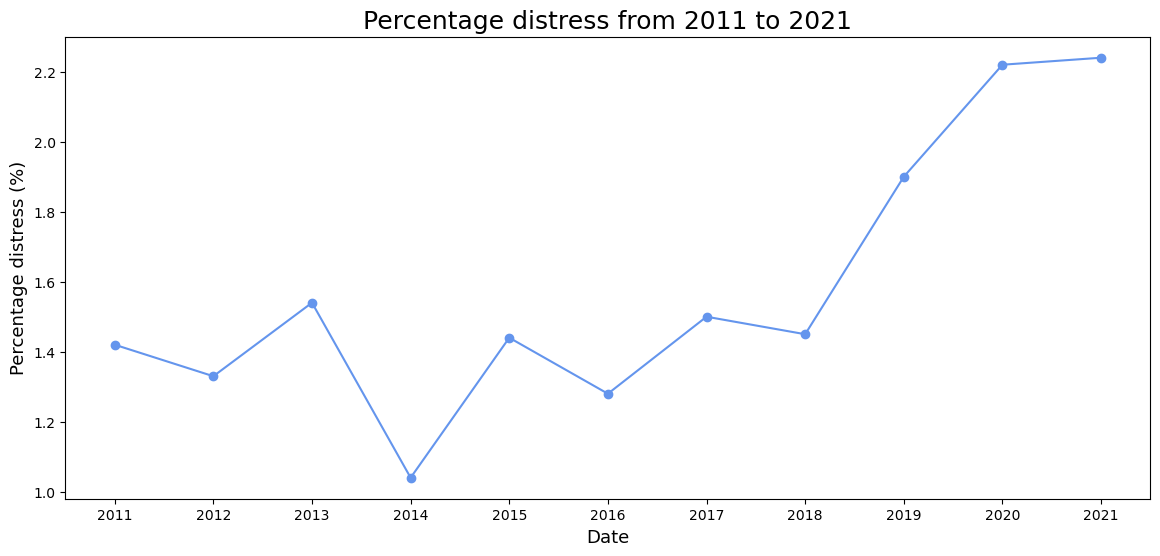

In [67]:
# Set figure size
plt.figure(figsize=[14,6])

# Plot graph
plt.plot(percent_distress_year['percentage_distress'], color='cornflowerblue', marker='o')

# Set xtick marks
x = np.arange(2011, 2022, 1)

# Graph formatting
plt.title('Percentage distress from 2011 to 2021', size=18) # Setting plot title
plt.ylabel('Percentage distress (%)', size=13) # Setting label of y-axis
plt.xlabel('Date', size=13) # Setting label of x-axis
plt.xticks(x) # Setting tick marks
plt.savefig('./files/images/eda/percent_distress_year.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:

- Chart shows the percentage of distress for Hong Kong, Singapore, and South Korea in the period 2011 to 2021.
- From the time series, we can observe that there is **increasing percentage distress** across the years.


- The percentage distress remains relatively stable from 2011 to 2018 and **peaked from 2019 to 2021**, ranging around 1% to 3%.
- The **highest percentage distress** recorded is in **2021** (2.24%)
- The **lowest percentage distress** recorded is in **2014** (1.04%)


## (C) Percentage Distress by Country

In [68]:
# Add a new boolean column (true/false) called 'distress_country'
data_exp_df.loc[:, 'distress_country'] = data_exp_df.loc[:, 'first_year_distress'].isin(years_list)

# Change data type for 'distress_country' column from Boolean to Object
data_exp_df.loc[:,'distress_country'] = data_exp_df.loc[:,'distress_country'].astype(object)
# data_exp_df

In [69]:
# Count the number of distress for each country
distress_country = data_exp_df.loc[data_exp_df['distress_country'] == True].groupby('country').size()
# distress_country

# Count the number of observations for each country
observations_country = data_exp_df.groupby('country').size()
# observations_country

In [70]:
# Create a new dataframe and assign series to dataframe
percent_distress_country = pd.DataFrame(columns = ['nondistress','distress','total'])
percent_distress_country['total'] = observations_country
percent_distress_country['distress'] = distress_country.astype('Int64') # Change data type
percent_distress_country['nondistress'] = percent_distress_country['total'] - percent_distress_country['distress']
# percent_distress_country

In [71]:
# Get percentage_distress = Number of distress per country/Number of observations per country
percent_distress_country['percentage_distress'] = (percent_distress_country['distress']/percent_distress_country['total'])*100

# Rounding off 'percentage_distress' column values to 2 decimal places
percent_distress_country['percentage_distress'] = percent_distress_country['percentage_distress'].round(2)

# Sort values by percentage_distress
percent_distress_country = percent_distress_country.sort_values(by='percentage_distress', ascending=False)

In [72]:
# Change 'percentage_distress' column from float to string data type and add percent sign
percent_distress_country_table = percent_distress_country.copy()

# Sort values by percentage_distress
percent_distress_country_table = percent_distress_country_table.sort_values(by='percentage_distress', ascending=False)
percent_distress_country_table['percentage_distress'] = percent_distress_country_table['percentage_distress'].astype(str) + '%'
percent_distress_country_table

,nondistress,distress,total,percentage_distress
country,,,,
SINGAPORE,375,45,420,10.71%
HONG KONG,1350,138,1488,9.27%
SOUTH KOREA,1954,110,2064,5.33%


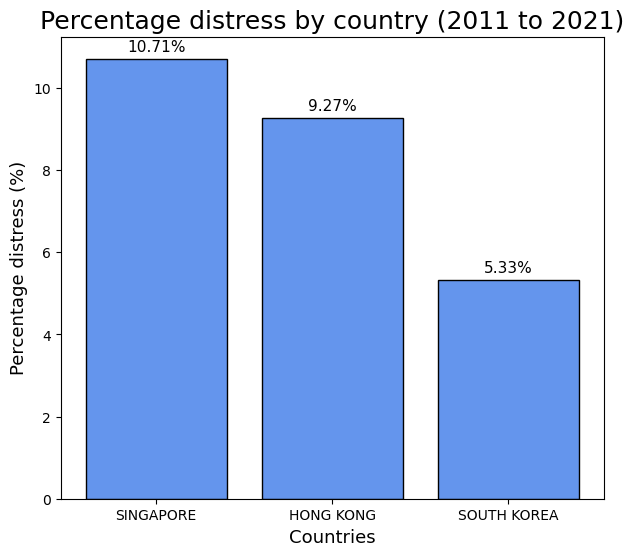

In [73]:
# Set figure size
plt.figure(figsize=[7,6])

# Set x and y
x = percent_distress_country.index # Countries name
y = percent_distress_country['percentage_distress'] # Percentage distress

# Plot bar chart
plot = plt.bar(x, y, color='cornflowerblue', edgecolor='black')

# Labels
plt.bar_label(plot, fmt='%.2f%%', fontsize=11, label_type='edge', padding=3)

# Graph formatting
plt.title('Percentage distress by country (2011 to 2021)', size=18) # Setting plot title
plt.ylabel('Percentage distress (%)', size=13) # Setting label of y-axis
plt.xlabel('Countries', size=13) # Setting label of x-axis
plt.savefig('./files/images/eda/percent_distress_country.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observation:**
- **Singapore has the highest percentage distress (10.71%)**, followed by Hong Kong (9.27%), and South Korea (5.33%)

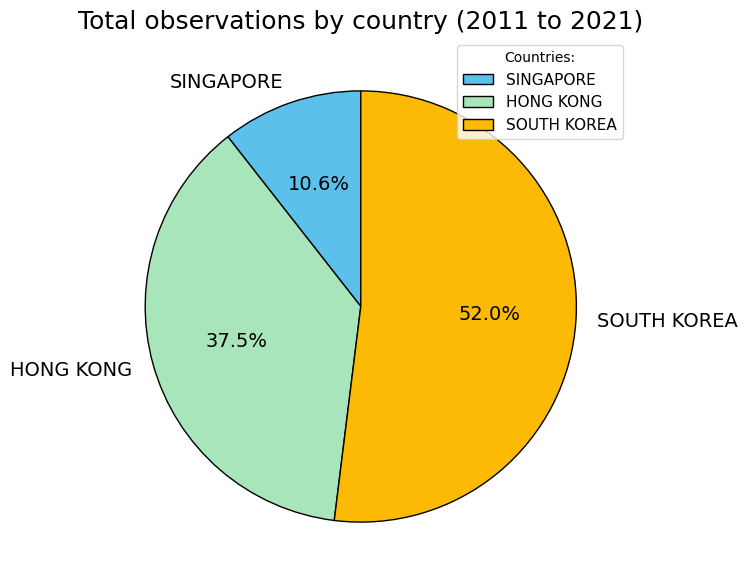

In [74]:
# Set figure size
plt.figure(figsize=[7,7])

# Set data and labels
labels = percent_distress_country.index.values # Countries name
data = percent_distress_country['total'] # Total observations
colors = ['#5BC0EB','#A9E5BB','#FCBA04']

# Plot pie chart
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 14},
        wedgeprops = {"edgecolor":"k", 'linewidth' : 1})

# Graph formatting
plt.title('Total observations by country (2011 to 2021)', size=18) # Setting plot title
plt.legend(title = "Countries:", fontsize=11)
plt.savefig('./files/images/eda/obervations_country.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- South Korea constitutes the **highest proportion** (52%) of the dataset while possessing the **lowest percentage distress**
- SMEs from South Korea could potentially be accountable for bringing down the overall percentage distress in our dataset

## (C) Percentage Distress by Industry

In [75]:
# Add a new boolean column (true/false) called 'distress_industry'
data_exp_df.loc[:, 'distress_industry'] = data_exp_df.loc[:, 'first_year_distress'].isin(years_list)

# Change data type for 'distress_industry' column from Boolean to Object
data_exp_df.loc[:,'distress_industry'] = data_exp_df.loc[:,'distress_industry'].astype(object)

In [76]:
# Count the number of distress for each industry
distress_industry = data_exp_df.loc[data_exp_df['distress_industry'] == True].groupby('industry').size()
# distress_industry

# Count the number of observations for each industry
observations_industry = data_exp_df.groupby('industry').size()
# observations_industry

In [77]:
# Create a new dataframe and assign series to dataframe
percent_distress_industry = pd.DataFrame(columns = ['nondistress','distress','total'])
percent_distress_industry['total'] = observations_industry
percent_distress_industry['distress'] = distress_industry.astype('Int64') # Change data type
percent_distress_industry['distress'] = percent_distress_industry['distress'].fillna(0) # Fill NA with 0
percent_distress_industry['nondistress'] = percent_distress_industry['total'] - percent_distress_industry['distress']
# percent_distress_industry

In [78]:
# Get percentage_distress = Number of distress per industry/Number of observations per industry
percent_distress_industry['percentage_distress'] = (percent_distress_industry['distress']/percent_distress_industry['total'])*100

# Rounding off 'percentage_distress' column values to 2 decimal places
percent_distress_industry['percentage_distress'] = percent_distress_industry['percentage_distress'].round(2)

# Sort values by percentage_distress
percent_distress_industry = percent_distress_industry.sort_values(by='percentage_distress', ascending=True)

In [79]:
# Change 'percentage_distress' column from float to string data type and add percent sign
percent_distress_industry_table = percent_distress_industry.copy()

# Sort values by percentage_distress
percent_distress_industry_table = percent_distress_industry_table.sort_values(by='percentage_distress', ascending=False)
percent_distress_industry_table['percentage_distress'] = percent_distress_industry_table['percentage_distress'].astype(str) + '%'
percent_distress_industry_table

,nondistress,distress,total,percentage_distress
industry,,,,
Energy,75,20,95,21.05%
Consumer Services,191,26,217,11.98%
Business Services,102,12,114,10.53%
Healthcare,366,35,401,8.73%
Technology,694,61,755,8.08%
Industrials,702,55,757,7.27%
Utilities,68,4,72,5.56%
Consumer Cyclicals,434,25,459,5.45%
Non-Energy Materials,607,35,642,5.45%


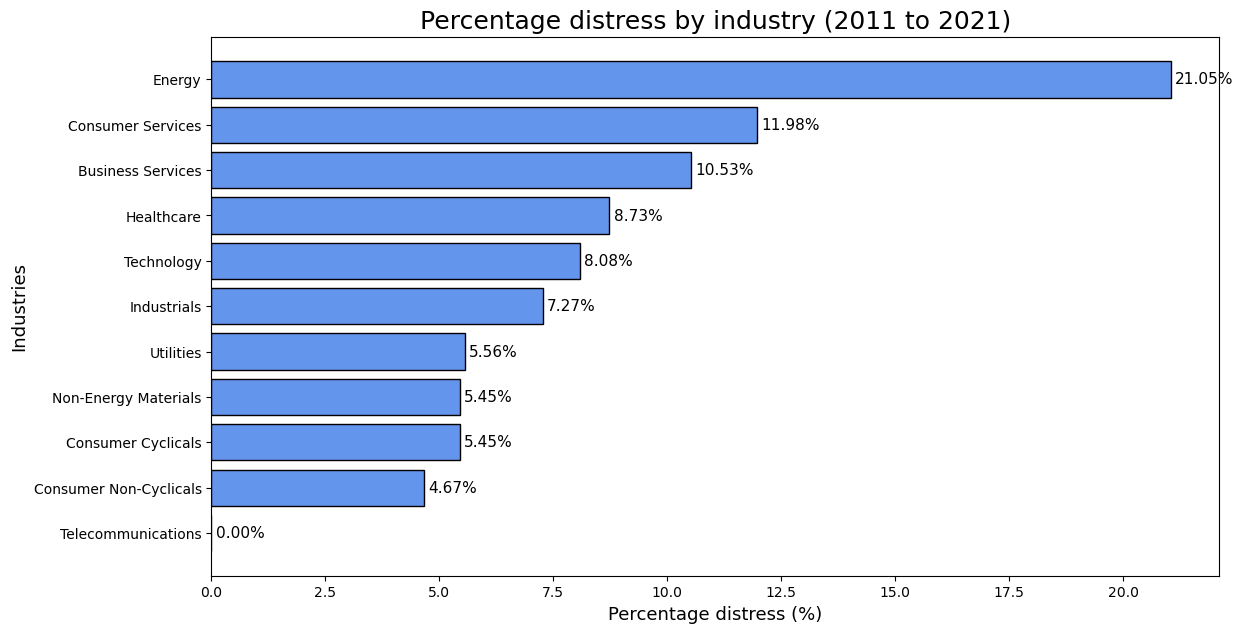

In [80]:
# Set figure size
plt.figure(figsize=[13,7])

# Set x and y
y = percent_distress_industry.index # Industry name
x = percent_distress_industry['percentage_distress'] # Percentage distress

# Plot bar chart
plot = plt.barh(y, x, color='cornflowerblue', edgecolor='black')

# Labels
plt.bar_label(plot, fmt='%.2f%%', fontsize=11, label_type='edge', padding=3)

# Graph formatting
plt.title('Percentage distress by industry (2011 to 2021)', size=18)  # Setting plot title
plt.ylabel('Industries', size=13) # Setting label of y-axis
plt.xlabel('Percentage distress (%)', size=13) # Setting label of x-axis
plt.savefig('./files/images/eda/percent_distress_industry.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations:**
- **Energy industry** has the **highest percentage distress** (21.05%)
- Telecommunications industry has the lowest percentage distress (0%)

In [81]:
# Sort values by total observations
totalobservations_industry_pie = percent_distress_industry_table.sort_values(by='total', ascending=False)

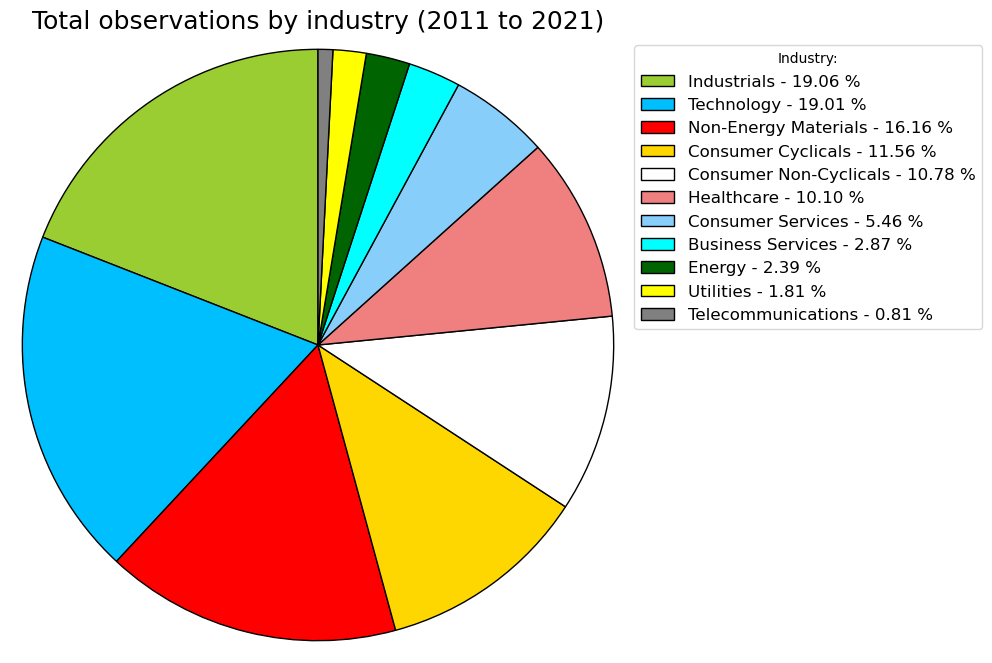

In [82]:
# Set figure size
plt.figure(figsize=[8,8])

# Set data and labels
labels = totalobservations_industry_pie.index.values # Industry name
data = totalobservations_industry_pie['total'] # Total observations
colors = ['yellowgreen' , 'deepskyblue', 'red', 'gold','white','lightcoral', 'lightskyblue','cyan', 
          'darkgreen','yellow', 'grey', 'pink', 'violet']

percent = 100.*data/data.sum()

# Plot pie chart
patches, texts = plt.pie(data, colors=colors, startangle=90, radius=1.2, textprops={'fontsize': 14},
                        wedgeprops = {"edgecolor":"k", 'linewidth' : 1})
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                          key=lambda x: x[2],
                                          reverse=True))

# Graph formatting
plt.title('Total observations by industry (2011 to 2021)', size=18) # Setting plot title
plt.legend(patches, labels, bbox_to_anchor=(1, 1), fontsize=12, title = "Industry:")
plt.savefig('./files/images/eda/obervations_industry.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

# (D) Market Value

In [83]:
# Summary statistics for 'market_value_2021'
data_exp_df['market_value_2021'].describe()

count      3845.000000
mean       1438.292467
std       12322.474629
min           0.083679
25%          44.385104
50%         105.498237
75%         344.109839
max      491450.394905
Name: market_value_2021, dtype: float64

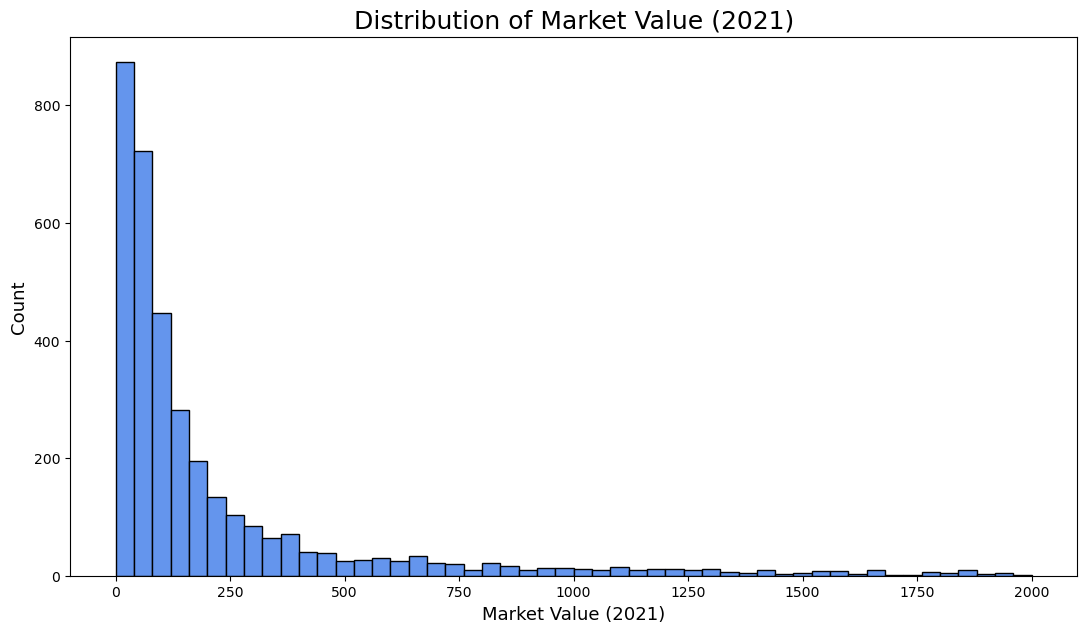

In [84]:
# Set figure size
plt.figure(figsize=[13,7])

# Set x
x = data_exp_df['market_value_2021'].values # Market value

# Plot histogram
plot = plt.hist(x, bins=50, range=[0, 2000], color='cornflowerblue', edgecolor='black', align='mid')

# Graph formatting
plt.title('Distribution of Market Value (2021)', size=18)  # Setting plot title
plt.ylabel('Count', size=13) # Setting label of y-axis
plt.xlabel('Market Value (2021)', size=13) # Setting label of x-axis
plt.savefig('./files/images/eda/marketvalue.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

In [85]:
# # Summary statistics for 'market_value_2021' (Companies with distress)
# 250 count
data_exp_df.loc[data_exp_df['first_year_distress'].notna(), 'market_value_2021'].describe()

count       250.000000
mean       1174.081577
std       10437.436932
min           0.288540
25%          18.595496
50%          58.113365
75%         193.573576
max      155994.716796
Name: market_value_2021, dtype: float64

In [86]:
# # Summary statistics for 'market_value_2021' (Companies without distress)
# 3595 count
data_exp_df.loc[data_exp_df['first_year_distress'].isna(), 'market_value_2021'].describe()

count      3595.000000
mean       1456.665964
std       12443.989244
min           0.083679
25%          46.978363
50%         109.536714
75%         361.028455
max      491450.394905
Name: market_value_2021, dtype: float64

In [87]:
# Get array for companies with distress
marketvalue_distress = data_exp_df.loc[data_exp_df['first_year_distress'].notna(), 'market_value_2021'].values
# marketvalue_distress

# Get array for companies without distress
marketvalue_nondistress = data_exp_df.loc[data_exp_df['first_year_distress'].isna(), 'market_value_2021'].values
# marketvalue_nondistress

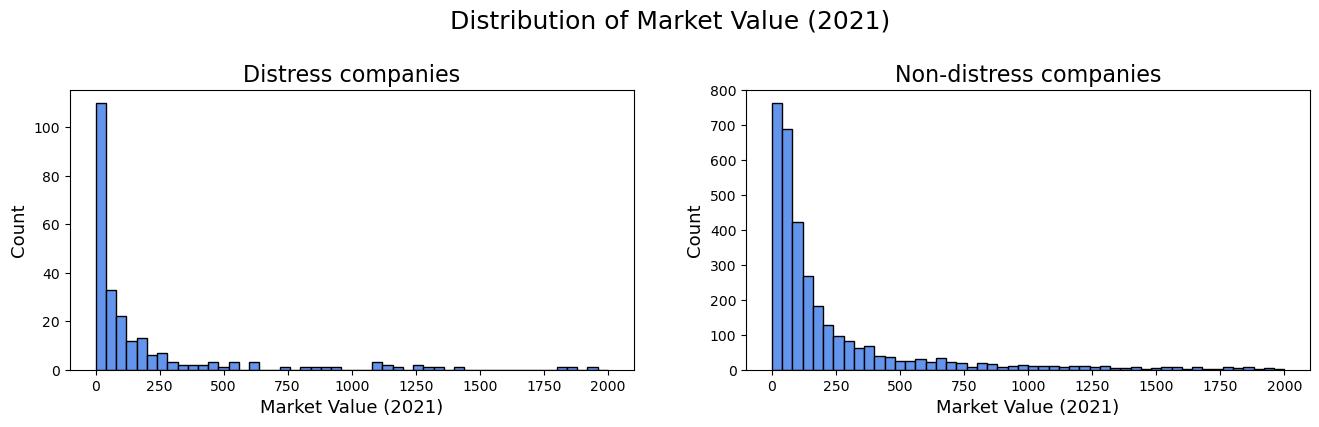

In [88]:
# # Set figure size
plt.figure(figsize=[16,8])

# Set main plot title
plt.suptitle('Distribution of Market Value (2021)', size=18)  

# Set x1 and x2
x1 = marketvalue_distress # Market value for distress companies
x2 = marketvalue_nondistress # Market value for non-distress companies

# Plot histogram for distress companies
plt.subplot(2, 2, 1)
plt.hist(x1, bins=50, range=[0, 2000], color='cornflowerblue', edgecolor='black', align='mid')

# # Formatting of subgraph
plt.title('Distress companies', size=16) # Setting subplot title
plt.ylabel('Count', size=13) # Setting label of y-axis
plt.xlabel('Market Value (2021)', size=13) # Setting label of x-axis

# Plot histogram for non-distress companies
plt.subplot(2, 2, 2)
plt.hist(x2, bins=50, range=[0, 2000], color='cornflowerblue', edgecolor='black', align='mid')

# # Formatting of subgraph
plt.title('Non-distress companies', size=16) # Setting subplot title
plt.ylabel('Count', size=13) # Setting label of y-axis
plt.xlabel('Market Value (2021)', size=13) # Setting label of x-axis

plt.savefig('./files/images/eda/marketvalue_twogroups.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

<br>

# Part 4: Data Pre-processing (2)

## 4A) Dataframe for companies that have never experienced distress

In [270]:
# Take companies that have never experienced distress ('first_year_distress' = NA)
df_no_distress = df_cleaned[df_cleaned['first_year_distress'].isna()]

In [271]:
# Filter for columns with years: 2019, 2020, 2021
df_no_distress = df_no_distress.filter(regex='2019|2020|2021')
df_no_distress

,market_value_2021,sales_2021,distress_2019,distress_2020,distress_2021,account_receivables_to_liabilities_2019,account_receivables_to_liabilities_2020,account_receivables_to_liabilities_2021,accounts_payable_to_sales_2019,accounts_payable_to_sales_2020,...,market_capitalisation_to_debt_2021,price_to_book_2019,price_to_book_2020,price_to_book_2021,price_to_earnings_2019,price_to_earnings_2020,price_to_earnings_2021,price_to_sales_2019,price_to_sales_2020,price_to_sales_2021
2975,3984.619220,57931.702474,0,0,0,0.100113,0.095261,0.092858,3.443699,2.086546,...,0.516645,0.562446,0.500792,0.413755,13.454226,15.330439,5.077994,0.122151,0.099626,0.066375
2989,3921.703765,2388.898661,0,0,0,0.469323,0.381902,0.484763,10.024384,9.897376,...,8.190814,3.801190,3.191020,2.276181,70.969013,54.846665,10.918304,3.148415,2.856126,1.582819
2993,278.869233,140.101935,0,0,0,0.421605,0.468901,0.543346,13.087082,18.073050,...,124.946362,0.755246,0.930714,1.002350,11.004785,10.371922,9.060895,1.681744,2.194502,1.920931
2995,500.611089,1218.782665,0,0,0,0.113431,0.104093,0.093405,21.357476,25.027532,...,1.292848,0.381114,0.734089,0.671651,24.893858,11.994984,8.317531,0.264508,0.445718,0.392343
2997,494.967684,377.478430,0,0,0,0.037818,0.065190,0.066322,3.834794,9.537536,...,7.513935,2.162323,4.152088,4.387903,17.425228,17.425228,17.425228,0.628243,1.814032,1.263265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35990,123.271055,854.130025,0,0,0,0.789596,0.660093,0.737863,22.619288,19.976911,...,0.341815,0.482006,0.474038,0.451800,11.796733,10.323145,8.849558,0.149475,0.144668,0.139874
36217,4247.247622,1702.528326,0,0,0,0.044811,0.018046,0.006757,0.381432,0.548809,...,0.686483,4.747958,8.028287,19.735184,31.015013,31.015013,31.015013,2.027153,5.124568,2.418229
36228,433.956190,90.414319,0,0,0,0.040801,0.006097,0.006714,2.805820,87.733702,...,0.234642,1.763188,1.239828,0.747533,36.023055,36.023055,36.023055,1.929195,17.780220,4.617799
36272,2873.378995,781.625868,0,0,0,0.675597,0.628403,0.664892,6.698784,8.238158,...,320.358899,3.285324,2.981997,4.969315,27.648438,21.003272,16.527819,3.907000,3.115375,3.599317


In [272]:
# Add ['company', 'country', 'industry'] columns into dataframe
df_no_distress[['company', 'country', 'industry']] = df_cleaned[['company', 'country', 'industry']]
# df_no_distress

# Shift ['company', 'country', 'industry'] columns to first position
cols_to_move = ['company', 'country', 'industry']
df_no_distress = df_no_distress[cols_to_move + [col for col in df_no_distress.columns if col not in cols_to_move]]
# df_no_distress

In [273]:
# Exclude unwanted columns
no_distress_filtered = df_no_distress[df_no_distress.columns[~df_no_distress.columns.isin(['market_value_2021', 'sales_2021'])]]

In [274]:
# Print dataframe
no_distress_filtered.head()

,company,country,industry,distress_2019,distress_2020,distress_2021,account_receivables_to_liabilities_2019,account_receivables_to_liabilities_2020,account_receivables_to_liabilities_2021,accounts_payable_to_sales_2019,...,market_capitalisation_to_debt_2021,price_to_book_2019,price_to_book_2020,price_to_book_2021,price_to_earnings_2019,price_to_earnings_2020,price_to_earnings_2021,price_to_sales_2019,price_to_sales_2020,price_to_sales_2021
2975,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,0,0,0,0.100113,0.095261,0.092858,3.443699,...,0.516645,0.562446,0.500792,0.413755,13.454226,15.330439,5.077994,0.122151,0.099626,0.066375
2989,ASMPT Limited,HONG KONG,Technology,0,0,0,0.469323,0.381902,0.484763,10.024384,...,8.190814,3.801190,3.191020,2.276181,70.969013,54.846665,10.918304,3.148415,2.856126,1.582819
2993,Yeebo (International Holdings) Limited,HONG KONG,Technology,0,0,0,0.421605,0.468901,0.543346,13.087082,...,124.946362,0.755246,0.930714,1.002350,11.004785,10.371922,9.060895,1.681744,2.194502,1.920931
2995,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,0,0,0,0.113431,0.104093,0.093405,21.357476,...,1.292848,0.381114,0.734089,0.671651,24.893858,11.994984,8.317531,0.264508,0.445718,0.392343
2997,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,0,0,0,0.037818,0.065190,0.066322,3.834794,...,7.513935,2.162323,4.152088,4.387903,17.425228,17.425228,17.425228,0.628243,1.814032,1.263265


In [275]:
# import dataframe_image as dfi
dfi.export(no_distress_filtered, './files/images/tables/no_distress_filtered_p1.png', max_rows=10, max_cols=10)

In [276]:
# Create a list of selected ratio names
no_distress_filtered_rationames = no_distress_filtered.loc[:, 'account_receivables_to_liabilities_2019':].columns.values.tolist()
# no_distress_filtered_rationames

# Create a list of selected years
selectedyears = [2019, 2020, 2021]

# Rename 'distress' columns names to respective years
no_distress_filtered.columns = ['company', 'country', 'industry'] + [year for year in selectedyears] + [name for name in no_distress_filtered_rationames]

In [277]:
# Print dataframe
no_distress_filtered.head()

,company,country,industry,2019,2020,2021,account_receivables_to_liabilities_2019,account_receivables_to_liabilities_2020,account_receivables_to_liabilities_2021,accounts_payable_to_sales_2019,...,market_capitalisation_to_debt_2021,price_to_book_2019,price_to_book_2020,price_to_book_2021,price_to_earnings_2019,price_to_earnings_2020,price_to_earnings_2021,price_to_sales_2019,price_to_sales_2020,price_to_sales_2021
2975,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,0,0,0,0.100113,0.095261,0.092858,3.443699,...,0.516645,0.562446,0.500792,0.413755,13.454226,15.330439,5.077994,0.122151,0.099626,0.066375
2989,ASMPT Limited,HONG KONG,Technology,0,0,0,0.469323,0.381902,0.484763,10.024384,...,8.190814,3.801190,3.191020,2.276181,70.969013,54.846665,10.918304,3.148415,2.856126,1.582819
2993,Yeebo (International Holdings) Limited,HONG KONG,Technology,0,0,0,0.421605,0.468901,0.543346,13.087082,...,124.946362,0.755246,0.930714,1.002350,11.004785,10.371922,9.060895,1.681744,2.194502,1.920931
2995,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,0,0,0,0.113431,0.104093,0.093405,21.357476,...,1.292848,0.381114,0.734089,0.671651,24.893858,11.994984,8.317531,0.264508,0.445718,0.392343
2997,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,0,0,0,0.037818,0.065190,0.066322,3.834794,...,7.513935,2.162323,4.152088,4.387903,17.425228,17.425228,17.425228,0.628243,1.814032,1.263265


In [278]:
# Create a copy of the dataframe
no_distress_filtered = no_distress_filtered.copy()

# Set distress columns as its respective years
for year in selectedyears:
    no_distress_filtered.loc[no_distress_filtered[year] == 0, year] = year

In [279]:
# Print dataframe
no_distress_filtered.head()

,company,country,industry,2019,2020,2021,account_receivables_to_liabilities_2019,account_receivables_to_liabilities_2020,account_receivables_to_liabilities_2021,accounts_payable_to_sales_2019,...,market_capitalisation_to_debt_2021,price_to_book_2019,price_to_book_2020,price_to_book_2021,price_to_earnings_2019,price_to_earnings_2020,price_to_earnings_2021,price_to_sales_2019,price_to_sales_2020,price_to_sales_2021
2975,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,2019,2020,2021,0.100113,0.095261,0.092858,3.443699,...,0.516645,0.562446,0.500792,0.413755,13.454226,15.330439,5.077994,0.122151,0.099626,0.066375
2989,ASMPT Limited,HONG KONG,Technology,2019,2020,2021,0.469323,0.381902,0.484763,10.024384,...,8.190814,3.801190,3.191020,2.276181,70.969013,54.846665,10.918304,3.148415,2.856126,1.582819
2993,Yeebo (International Holdings) Limited,HONG KONG,Technology,2019,2020,2021,0.421605,0.468901,0.543346,13.087082,...,124.946362,0.755246,0.930714,1.002350,11.004785,10.371922,9.060895,1.681744,2.194502,1.920931
2995,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,2019,2020,2021,0.113431,0.104093,0.093405,21.357476,...,1.292848,0.381114,0.734089,0.671651,24.893858,11.994984,8.317531,0.264508,0.445718,0.392343
2997,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,2019,2020,2021,0.037818,0.065190,0.066322,3.834794,...,7.513935,2.162323,4.152088,4.387903,17.425228,17.425228,17.425228,0.628243,1.814032,1.263265


In [280]:
# Rename column names by add prefix of 'year' to columns with years
no_distress_new_names = [(i,'year_' + str(i)) for i in selectedyears]
no_distress_filtered.rename(columns = dict(no_distress_new_names), inplace=True)

In [281]:
# Print dataframe
no_distress_filtered.head()

,company,country,industry,year_2019,year_2020,year_2021,account_receivables_to_liabilities_2019,account_receivables_to_liabilities_2020,account_receivables_to_liabilities_2021,accounts_payable_to_sales_2019,...,market_capitalisation_to_debt_2021,price_to_book_2019,price_to_book_2020,price_to_book_2021,price_to_earnings_2019,price_to_earnings_2020,price_to_earnings_2021,price_to_sales_2019,price_to_sales_2020,price_to_sales_2021
2975,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,2019,2020,2021,0.100113,0.095261,0.092858,3.443699,...,0.516645,0.562446,0.500792,0.413755,13.454226,15.330439,5.077994,0.122151,0.099626,0.066375
2989,ASMPT Limited,HONG KONG,Technology,2019,2020,2021,0.469323,0.381902,0.484763,10.024384,...,8.190814,3.801190,3.191020,2.276181,70.969013,54.846665,10.918304,3.148415,2.856126,1.582819
2993,Yeebo (International Holdings) Limited,HONG KONG,Technology,2019,2020,2021,0.421605,0.468901,0.543346,13.087082,...,124.946362,0.755246,0.930714,1.002350,11.004785,10.371922,9.060895,1.681744,2.194502,1.920931
2995,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,2019,2020,2021,0.113431,0.104093,0.093405,21.357476,...,1.292848,0.381114,0.734089,0.671651,24.893858,11.994984,8.317531,0.264508,0.445718,0.392343
2997,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,2019,2020,2021,0.037818,0.065190,0.066322,3.834794,...,7.513935,2.162323,4.152088,4.387903,17.425228,17.425228,17.425228,0.628243,1.814032,1.263265


In [282]:
# import dataframe_image as dfi
dfi.export(no_distress_filtered, './files/images/tables/no_distress_filtered_p2.png', max_rows=10, max_cols=10)

In [283]:
# Create dictionary
replacers_no_distress = {'_2019$':'',
                        '_2020$':'',
                        '_2021$':''}

# Rename column names
for k, v in replacers_no_distress.items():
    no_distress_filtered.columns = no_distress_filtered.columns.str.replace(k, v, regex=True)

In [284]:
# Check shape of dataframe before duplicating 'company' column
# There are 81 columns
no_distress_filtered.shape

(3679, 81)

In [285]:
# Create a list of selected columns
col_list = ['company', 'country', 'industry']

# Duplicate 'company' column n-times
n = 3
no_distress_filtered = no_distress_filtered.loc[:, [i for i in col_list for repetitions in range(n)] + 
                   no_distress_filtered.columns.difference(['company', 'country', 'industry']).tolist()]

In [286]:
# Check shape of dataframe after duplicating 'company' column
# There are 87 columns; Number of columns increased
no_distress_filtered.shape

(3679, 87)

In [294]:
# Check dataframe
no_distress_filtered.head()

,company,company,company,country,country,country,industry,industry,industry,account_receivables_to_liabilities,...,sales_to_account_receivables,times_interest_earned,times_interest_earned,times_interest_earned,working_capital_over_total_assets,working_capital_over_total_assets,working_capital_over_total_assets,year,year,year
2975,Jiangxi Copper Company Limited Class H,Jiangxi Copper Company Limited Class H,Jiangxi Copper Company Limited Class H,HONG KONG,HONG KONG,HONG KONG,Non-Energy Materials,Non-Energy Materials,Non-Energy Materials,0.100113,...,54.561218,2.036948,2.979251,5.761581,0.116088,0.154971,0.161428,2019,2020,2021
2989,ASMPT Limited,ASMPT Limited,ASMPT Limited,HONG KONG,HONG KONG,HONG KONG,Technology,Technology,Technology,0.469323,...,3.940011,5.661094,6.874468,42.241571,0.429291,0.408546,0.428729,2019,2020,2021
2993,Yeebo (International Holdings) Limited,Yeebo (International Holdings) Limited,Yeebo (International Holdings) Limited,HONG KONG,HONG KONG,HONG KONG,Technology,Technology,Technology,0.421605,...,4.620699,13.222155,15.919613,128.598123,0.135625,0.119756,0.116028,2019,2020,2021
2995,"First Tractor Co., Ltd. Class H","First Tractor Co., Ltd. Class H","First Tractor Co., Ltd. Class H",HONG KONG,HONG KONG,HONG KONG,Industrials,Industrials,Industrials,0.113431,...,15.206130,-1.456506,-0.791160,11.213769,0.009255,0.046045,0.146257,2019,2020,2021
2997,Sa Sa International Holdings Limited,Sa Sa International Holdings Limited,Sa Sa International Holdings Limited,HONG KONG,HONG KONG,HONG KONG,Consumer Non-Cyclicals,Consumer Non-Cyclicals,Consumer Non-Cyclicals,0.037818,...,44.925815,-14.130324,-34.618458,-29.476397,0.284008,0.291352,0.217410,2019,2020,2021


In [295]:
# import dataframe_image as dfi
dfi.export(no_distress_filtered, './files/images/tables/no_distress_filtered_p3.png', max_rows=10, max_cols=8)

In [289]:
# Generate list of column names after renaming
no_distress_cols = no_distress_filtered.columns.tolist()

# Remove duplicates in list
new_nodistress_cols = pd.unique(no_distress_cols).tolist()

In [290]:
# Change DataFrame format from wide to long
# Note: Index resets
meltedlist = []

for i in new_nodistress_cols:
    melteddf = no_distress_filtered[i].melt()['value']
    meltedlist.append(melteddf)

In [291]:
# Concatenating all dataframes
no_distress = pd.concat(meltedlist, axis=1, keys=new_nodistress_cols)
no_distress

,company,country,industry,account_receivables_to_liabilities,accounts_payable_to_sales,asset_turnover,cash_conversion_cycle,cash_flow_to_sales,cash_ratio,current_ratio,...,net_income_margin,operating_margin,price_to_book,price_to_earnings,price_to_sales,return_on_assets,sales_to_account_receivables,times_interest_earned,working_capital_over_total_assets,year
0,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,0.100113,3.443699,2.025741,42.878173,0.030465,0.590973,1.229032,...,1.017586,1.601622,0.562446,13.454226,0.122151,2.061365,32.129955,2.036948,0.116088,2019
1,ASMPT Limited,HONG KONG,Technology,0.469323,10.024384,0.669363,346.751192,0.190047,0.524919,3.019004,...,4.947610,8.611094,3.801190,70.969013,3.148415,3.311744,3.235899,5.661094,0.429291,2019
2,Yeebo (International Holdings) Limited,HONG KONG,Technology,0.421605,13.087082,0.364789,85.329838,0.154087,1.032610,2.263283,...,15.227393,0.746354,0.755246,11.004785,1.681744,5.554789,6.441492,13.222155,0.135625,2019
3,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,0.113431,21.357476,0.468111,65.084161,0.073650,0.484034,1.017064,...,1.062672,-3.197674,0.381114,24.893858,0.264508,0.497448,7.707923,-1.456506,0.009255,2019
4,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,0.037818,3.834794,1.713386,73.067234,0.116335,0.603271,1.872607,...,-8.309576,-6.430869,2.162323,17.425228,0.628243,-14.237510,92.366775,-14.130324,0.284008,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11032,Asia Allied Infrastructure Holdings Limited,HONG KONG,Industrials,0.737863,21.711281,0.906419,164.583674,-0.014757,0.280031,1.363959,...,1.579876,-0.619588,0.451800,8.849558,0.139874,1.432029,1.667107,-0.644820,0.224451,2021
11033,Melco Resorts & Entertainment Ltd. Sponsored ADR,HONG KONG,Consumer Services,0.006757,0.297760,0.224786,21.373653,-0.152145,1.617773,1.828728,...,-40.338340,-26.969333,19.735184,31.015013,2.418229,-9.067485,35.530917,-1.384710,0.095328,2021
11034,Studio City International Holdings Ltd. Sponso...,HONG KONG,Consumer Services,0.006714,49.878355,0.033591,-28.605517,-1.280467,1.960071,2.212908,...,-236.324250,-178.340570,0.747533,36.023055,4.617799,-7.938406,6.448768,-2.095144,0.093090,2021
11035,Silicon Motion Technology Corporation Sponsore...,HONG KONG,Technology,0.664892,8.741383,1.078476,127.581088,0.189457,1.451369,2.906063,...,21.689838,26.664028,4.969315,16.527819,3.599317,23.391966,4.262117,8905.727394,0.552432,2021


In [292]:
# Add a 'status' column (categorical) as nondistress indication
no_distress['status'] = 'nondistress'
# no_distress

In [293]:
# Create a list of column names
col_order = no_distress.columns.tolist()
# col_order

# Rearrange column order
col_order = ['company', 'country', 'industry', 'status', 'year'] + no_distress.loc[:, 'account_receivables_to_liabilities': 'working_capital_over_total_assets'].columns.values.tolist()

# Reorder dataframe
no_distress = no_distress[col_order]
no_distress.head()

,company,country,industry,status,year,account_receivables_to_liabilities,accounts_payable_to_sales,asset_turnover,cash_conversion_cycle,cash_flow_to_sales,...,market_capitalisation_to_debt,net_income_margin,operating_margin,price_to_book,price_to_earnings,price_to_sales,return_on_assets,sales_to_account_receivables,times_interest_earned,working_capital_over_total_assets
0,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,nondistress,2019,0.100113,3.443699,2.025741,42.878173,0.030465,...,0.528091,1.017586,1.601622,0.562446,13.454226,0.122151,2.061365,32.129955,2.036948,0.116088
1,ASMPT Limited,HONG KONG,Technology,nondistress,2019,0.469323,10.024384,0.669363,346.751192,0.190047,...,9.620964,4.947610,8.611094,3.801190,70.969013,3.148415,3.311744,3.235899,5.661094,0.429291
2,Yeebo (International Holdings) Limited,HONG KONG,Technology,nondistress,2019,0.421605,13.087082,0.364789,85.329838,0.154087,...,100.646798,15.227393,0.746354,0.755246,11.004785,1.681744,5.554789,6.441492,13.222155,0.135625
3,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,nondistress,2019,0.113431,21.357476,0.468111,65.084161,0.073650,...,0.356653,1.062672,-3.197674,0.381114,24.893858,0.264508,0.497448,7.707923,-1.456506,0.009255
4,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,nondistress,2019,0.037818,3.834794,1.713386,73.067234,0.116335,...,3.335079,-8.309576,-6.430869,2.162323,17.425228,0.628243,-14.237510,92.366775,-14.130324,0.284008


In [114]:
# import dataframe_image as dfi
dfi.export(no_distress, './files/images/tables/final_no_distress.png', max_rows=10, max_cols=10)

## 4B) Dataframe for companies with distress

In [115]:
# Take companies that experienced distress ('first_year_distress' = not NA)
df_distress = df_cleaned[df_cleaned['first_year_distress'].notna()]
df_distress

,symbol,company,country,industry,market_value_2021,sales_2021,distress_2011,distress_2012,distress_2013,distress_2014,...,price_to_sales_2013,price_to_sales_2014,price_to_sales_2015,price_to_sales_2016,price_to_sales_2017,price_to_sales_2018,price_to_sales_2019,price_to_sales_2020,price_to_sales_2021,first_year_distress
3248,603230,Alco Holdings Limited,HONG KONG,Technology,NaN,65.402236,0,0,0,0,...,0.329147,0.361851,0.583573,0.587605,0.389609,0.303713,0.188101,0.135748,0.127209,2021
3262,603620,China Energine International Holdings Ltd.,HONG KONG,Utilities,75.605557,0.990493,0,0,0,0,...,2.089485,1.296474,1.152066,1.049194,6.219634,13.376979,31.288140,15.704602,73.661017,2019
3642,607986,"Chongqing Iron & Steel Co., Ltd. Class H",HONG KONG,Non-Energy Materials,1287.598192,5206.309305,0,0,0,0,...,0.109886,0.492251,0.516850,1.966343,1.152433,0.384659,0.346328,0.256783,0.238663,2016
4304,612468,Charisma Energy Services Limited,SINGAPORE,Utilities,NaN,11.488341,0,0,0,0,...,8.813349,1.721048,3.810684,2.437578,2.399199,0.567783,1.450541,1.450541,1.450541,2019
4970,616922,"Luxon Energy Holdings Co., Ltd.",SOUTH KOREA,Energy,NaN,12.231499,0,0,0,0,...,1.275029,1.275029,1.275029,1.275029,1.275029,1.275029,1.275029,1.275029,1.275029,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35630,BZ12W7,Risecomm Group Holdings Limited,HONG KONG,Technology,36.854939,32.553247,<NA>,<NA>,1,0,...,7.425145,7.425145,7.425145,7.425145,7.425145,2.678675,4.125895,0.936871,0.672959,2013
35637,BZ13Q9,E-Commodities Holdings Limited,HONG KONG,Industrials,377.859437,4482.644272,0,0,0,0,...,0.138805,0.127266,0.095236,0.150190,0.119468,0.037956,0.039803,0.051169,0.088814,2015
35692,BZ1GTS,China Digital Culture (Group) Limited,HONG KONG,Consumer Services,NaN,6.821013,0,0,0,0,...,12.853395,4.314475,4.418848,3.533034,2.831779,1.143124,0.953043,1.407275,1.407275,2020
35934,BZBGB1,Innovative Pharmaceutical Biotech Limited,HONG KONG,Consumer Non-Cyclicals,25.037251,1.232738,0,0,1,0,...,40.054555,37.159318,77.693219,95.625971,45.839955,31.506654,25.608314,24.003164,19.575124,2013


In [116]:
# Get list of first_year_distress column
firstyear_distress_list = list(df_distress['first_year_distress'])
# firstyear_distress_list

In [117]:
# Exclude unwanted columns
distress_filtered = df_distress[df_distress.columns[~df_distress.columns.isin(['symbol', 'company','country', 'industry',
                                                                               'market_value_2021','sales_2021',
                                                                               'first_year_distress'] + 
                                                                          list_of_distressnames)]]

In [118]:
# Print dataframe
distress_filtered

,account_receivables_to_liabilities_2011,account_receivables_to_liabilities_2012,account_receivables_to_liabilities_2013,account_receivables_to_liabilities_2014,account_receivables_to_liabilities_2015,account_receivables_to_liabilities_2016,account_receivables_to_liabilities_2017,account_receivables_to_liabilities_2018,account_receivables_to_liabilities_2019,account_receivables_to_liabilities_2020,...,price_to_sales_2012,price_to_sales_2013,price_to_sales_2014,price_to_sales_2015,price_to_sales_2016,price_to_sales_2017,price_to_sales_2018,price_to_sales_2019,price_to_sales_2020,price_to_sales_2021
3248,0.670906,0.607534,0.836185,0.923244,0.666993,1.293785,2.269594,1.285339,0.723321,0.291640,...,0.503678,0.329147,0.361851,0.583573,0.587605,0.389609,0.303713,0.188101,0.135748,0.127209
3262,0.086514,0.210624,0.313761,0.303434,0.363931,0.572897,0.724239,0.507979,0.350126,0.000520,...,1.423385,2.089485,1.296474,1.152066,1.049194,6.219634,13.376979,31.288140,15.704602,73.661017
3642,0.093770,0.068553,0.023041,0.018703,0.015629,0.007562,0.020469,0.072477,0.114962,0.105838,...,0.110031,0.109886,0.492251,0.516850,1.966343,1.152433,0.384659,0.346328,0.256783,0.238663
4304,0.712114,0.608696,0.054176,0.212026,0.055646,0.081293,0.088936,0.042386,0.084221,0.130285,...,15.905651,8.813349,1.721048,3.810684,2.437578,2.399199,0.567783,1.450541,1.450541,1.450541
4970,0.384919,0.274676,0.318721,0.165848,0.092742,0.082282,0.065511,0.052538,0.046631,0.000000,...,0.304776,1.275029,1.275029,1.275029,1.275029,1.275029,1.275029,1.275029,1.275029,1.275029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35630,0.152489,0.152489,0.152489,0.333923,0.391426,0.796894,1.558775,0.336996,0.270265,0.221778,...,7.425145,7.425145,7.425145,7.425145,7.425145,7.425145,2.678675,4.125895,0.936871,0.672959
35637,0.339161,0.075749,0.110179,0.078153,0.096692,0.427151,0.756251,0.758261,0.385176,0.247610,...,0.395978,0.138805,0.127266,0.095236,0.150190,0.119468,0.037956,0.039803,0.051169,0.088814
35692,0.178529,0.185227,0.901549,1.126264,0.711550,0.317015,0.142499,0.104541,0.141086,0.030439,...,19.323170,12.853395,4.314475,4.418848,3.533034,2.831779,1.143124,0.953043,1.407275,1.407275
35934,0.870136,0.012426,0.013969,0.006320,0.000000,0.003738,0.007063,0.027012,0.018339,0.014670,...,13.563386,40.054555,37.159318,77.693219,95.625971,45.839955,31.506654,25.608314,24.003164,19.575124


In [119]:
# Generate list of column names
distress_cols = distress_filtered.columns.tolist()
# distress_cols

# years_list

# Add prefix to each year in years_list
replacers_distress_list = ['_' + str(s) for s in years_list]
# replacers_distress_list

# Convert list to dictionary
replacers_distress = {k: '' for k in replacers_distress_list}
# replacers_distress

# Rename column names in list (Remove _2011, _2012, _2013, ... in the list) 
for index, colname in enumerate(distress_cols):
    for key in replacers_distress:
        if key in colname:
            distress_cols[index] = colname.replace(key, replacers_distress[key])
            
# Remove duplicates in list
new_distress_cols = pd.unique(distress_cols).tolist()
# new_distress_cols

In [120]:
# Create a list of column names
df_list = []

# Append sliced dataframe (according to ratio) into list
for name in new_distress_cols:
    df = df_distress.filter(regex=name)
    df_list.append(df)

In [121]:
# Drop unwanted columns (Drop 'long_term_debt_to_assets' under 'debt_to_asset')
df_list[5] = df_list[5].drop(df_list[5].columns[11:22], axis=1)
# df_list

In [122]:
# Check the length of the list
# There are 25 ratios
print(len(df_list))

25


In [123]:
# Create a list of dataframes
nestedlist = []

for df in df_list:
    # Rename columns to years
    df.columns = [year for year in years_list]
    
    # Get index position for column = 'first_year_distress'
    index_list = [df.columns.get_loc(c) for c in firstyear_distress_list if c in df]
    
    # For each row, get the index where first year of distress occured. And from that index, get 2 years before including 
    # first year distress, therefore n=3 years.
    count = 0
    rows = []
    for index in index_list:
        x = df.iloc[count,index-2:index+1].tolist()
        count += 1
        rows.append(x)
    nestedlist.append(rows)

In [124]:
# Print length of list
# Check n = 3 years for each dataframe
print(len(nestedlist[0][0]))

3


In [125]:
# Convert lists to dataframes
list_distress_dfs = [pd.DataFrame(df) for df in nestedlist]
# list_distress_dfs

In [126]:
# Duplicate each ratio name by n-times
n = 3
distress_names = [i for i in new_distress_cols for j in range(n)]

# Create nested list
distress_names = [distress_names[i:i+n] for i in range(0, len(distress_names), n)]
# distress_names[0]

# Rename dataframes
for i in range(len(list_distress_dfs)):
    list_distress_dfs[i].columns = distress_names[i]

In [127]:
# Create a new dataframe
df_year = df_distress[['first_year_distress']]

In [128]:
# Create 3 columns of years
i = 0 # Counter
n = 3 # n defined as 3 years

df_year = df_year.copy()

for j in range(n-1): # Create 2 new columns (n-1), the third column is the first_year_distress
    df_year['year' + str(j+1)] = df_year['first_year_distress'] - (j+1) # Create (n-1) new column
    i += 1

In [129]:
# Formatting
# Reverse the order of dataframe
df_year = df_year[df_year.columns[::-1]]
# df_year

# Reset index
df_year = df_year.reset_index(drop=True)
# df_year

# Create a list of 'year' duplicated n-times
n = 3
yearname = ['year']*n
# yearname

# Rename dataframe
df_year.columns = yearname
# df_year

In [130]:
# Check the length of the list before adding a new dataframe into the list of dataframe
print('Before:', len(list_distress_dfs))

# Insert df_year into the list of dataframe
list_distress_dfs.insert(0, df_year)

# Check that the length of the list has increased
print('After:', len(list_distress_dfs))

Before: 25
After: 26


In [131]:
# Duplicate selected columns ['company', 'country', 'industry'] n-times and change order of columns based on column names
n = 3
df_col = df_distress[['company', 'country', 'industry']*n].sort_index(axis=1)
# df_col

# Reset index
df_col = df_col.reset_index(drop=True)
# df_col

In [132]:
# Check the length of the list before adding a new dataframe into the list of dataframe
print('Before:', len(list_distress_dfs))

# Insert df_col into the list of dataframe
list_distress_dfs.insert(0, df_col)

# Check that the length of the list has increased
print('After:', len(list_distress_dfs))

Before: 26
After: 27


In [133]:
# Check selected dataframe
list_distress_dfs[0].head()

,company,company,company,country,country,country,industry,industry,industry
0,Alco Holdings Limited,Alco Holdings Limited,Alco Holdings Limited,HONG KONG,HONG KONG,HONG KONG,Technology,Technology,Technology
1,China Energine International Holdings Ltd.,China Energine International Holdings Ltd.,China Energine International Holdings Ltd.,HONG KONG,HONG KONG,HONG KONG,Utilities,Utilities,Utilities
2,"Chongqing Iron & Steel Co., Ltd. Class H","Chongqing Iron & Steel Co., Ltd. Class H","Chongqing Iron & Steel Co., Ltd. Class H",HONG KONG,HONG KONG,HONG KONG,Non-Energy Materials,Non-Energy Materials,Non-Energy Materials
3,Charisma Energy Services Limited,Charisma Energy Services Limited,Charisma Energy Services Limited,SINGAPORE,SINGAPORE,SINGAPORE,Utilities,Utilities,Utilities
4,"Luxon Energy Holdings Co., Ltd.","Luxon Energy Holdings Co., Ltd.","Luxon Energy Holdings Co., Ltd.",SOUTH KOREA,SOUTH KOREA,SOUTH KOREA,Energy,Energy,Energy


In [134]:
# Concatenating dataframes
distress_dfs = pd.concat(list_distress_dfs, axis=1) 
# distress_dfs

In [135]:
# Add ['company', 'country', 'industry', 'year'] to the list of unique values
new_distress_cols = ['company', 'country', 'industry', 'year'] + new_distress_cols

In [136]:
# Change the DataFrame format from wide to long
# Note: Index resets
meltedlist_distress = []

for i in new_distress_cols:
    melteddf = distress_dfs[i].melt()['value']
    meltedlist_distress.append(melteddf)

In [137]:
# Concatenating dataframes
distress = pd.concat(meltedlist_distress, axis=1, keys=new_distress_cols)
distress

,company,country,industry,year,account_receivables_to_liabilities,accounts_payable_to_sales,asset_turnover,inventory_turnover,sales_to_account_receivables,debt_to_asset,...,ebitda_to_assets,ebit_to_assets,operating_margin,net_income_margin,return_on_assets,dividend_yield_ratio,market_capitalisation_to_debt,price_to_book,price_to_earnings,price_to_sales
0,Alco Holdings Limited,HONG KONG,Technology,2019,0.723321,4.123502,0.653273,2.805992,2.432124,0.326308,...,-0.288717,-0.344601,-44.514724,-62.353862,-40.734074,0.0,0.455676,0.265286,16.641810,0.188101
1,China Energine International Holdings Ltd.,HONG KONG,Utilities,2017,0.724239,604.798910,0.043295,1.156916,0.104568,0.299351,...,-0.044325,-0.053413,-110.992582,-85.588086,-3.705521,0.0,0.936244,0.805430,33.333437,6.219634
2,"Chongqing Iron & Steel Co., Ltd. Class H",HONG KONG,Non-Energy Materials,2014,0.018703,100.764095,0.255818,1.435496,16.214027,0.447206,...,-0.010795,-0.031239,-13.097016,0.420035,0.107453,0.0,0.287790,0.608447,113.244912,0.492251
3,Charisma Energy Services Limited,SINGAPORE,Utilities,2017,0.088936,2.660070,0.130772,41.172859,2.381066,0.627980,...,0.123320,0.061444,43.027125,-158.102249,-20.675426,0.0,0.530511,1.259446,60.000000,2.399199
4,"Luxon Energy Holdings Co., Ltd.",SOUTH KOREA,Energy,2016,0.082282,0.906015,0.000000,0.247876,0.000000,0.291993,...,-0.072490,-0.073376,-11835.332446,-17657.644119,-24.274601,0.0,1.945366,0.080429,0.168067,1.275029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,Risecomm Group Holdings Limited,HONG KONG,Technology,2013,0.152489,34.074801,1.047268,4.498502,5.777181,0.586737,...,0.146826,0.136016,12.188252,-3.485639,18.257457,0.0,10.390359,6.388780,185.929558,7.425145
695,E-Commodities Holdings Limited,HONG KONG,Industrials,2015,0.096692,4.220428,0.882942,16.688232,13.560007,1.290123,...,-0.099274,-0.116058,-5.588564,-28.154668,-24.858930,0.0,0.156799,2.458853,2.212018,0.095236
696,China Digital Culture (Group) Limited,HONG KONG,Consumer Services,2020,0.030439,0.887185,0.086412,1.232474,3.741451,0.993507,...,-0.195183,-0.276594,-212.677881,-639.508144,-55.261439,0.0,0.230885,0.536880,43.333333,1.407275
697,Innovative Pharmaceutical Biotech Limited,HONG KONG,Consumer Non-Cyclicals,2013,0.013969,12.146177,0.072270,362.671070,3.575774,1.078577,...,-0.063696,-0.069005,-125.403443,-1867.586740,-134.969904,0.0,2.074112,1.082316,301.125597,40.054555


In [138]:
# Add a 'status' column (categorical) as distress indication
distress['status'] = 'distress'
# distress

In [139]:
# Reorder dataframe based on col_order that was previously defined in non-distress
distress = distress[col_order]
distress.head()

,company,country,industry,status,year,account_receivables_to_liabilities,accounts_payable_to_sales,asset_turnover,cash_conversion_cycle,cash_flow_to_sales,...,market_capitalisation_to_debt,net_income_margin,operating_margin,price_to_book,price_to_earnings,price_to_sales,return_on_assets,sales_to_account_receivables,times_interest_earned,working_capital_over_total_assets
0,Alco Holdings Limited,HONG KONG,Technology,distress,2019,0.723321,4.123502,0.653273,295.651331,-0.252251,...,0.455676,-62.353862,-44.514724,0.265286,16.641810,0.188101,-40.734074,2.432124,-16.351256,0.473233
1,China Energine International Holdings Ltd.,HONG KONG,Utilities,distress,2017,0.724239,604.798910,0.043295,-76.988648,-0.629875,...,0.936244,-85.588086,-110.992582,0.805430,33.333437,6.219634,-3.705521,0.104568,-3.925009,-0.193734
2,"Chongqing Iron & Steel Co., Ltd. Class H",HONG KONG,Non-Energy Materials,distress,2014,0.018703,100.764095,0.255818,-85.876417,0.230099,...,0.287790,0.420035,-13.097016,0.608447,113.244912,0.492251,0.107453,16.214027,-1.068048,-0.300652
3,Charisma Energy Services Limited,SINGAPORE,Utilities,distress,2017,0.088936,2.660070,0.130772,233.121621,0.299788,...,0.530511,-158.102249,43.027125,1.259446,60.000000,2.399199,-20.675426,2.381066,2.178152,-0.235434
4,"Luxon Energy Holdings Co., Ltd.",SOUTH KOREA,Energy,distress,2016,0.082282,0.906015,0.000000,107.458628,-30.206026,...,1.945366,-17657.644119,-11835.332446,0.080429,0.168067,1.275029,-24.274601,0.000000,-4.038569,-0.266891


In [140]:
# import dataframe_image as dfi
dfi.export(distress, './files/images/tables/final_distress.png', max_rows=10, max_cols=7)

In [141]:
# Check for missing values
# There are no missing values
distress.isna().sum()

company                               0
country                               0
industry                              0
status                                0
year                                  0
account_receivables_to_liabilities    0
accounts_payable_to_sales             0
asset_turnover                        0
cash_conversion_cycle                 0
cash_flow_to_sales                    0
cash_ratio                            0
current_ratio                         0
debt_to_asset                         0
debt_to_ebitda                        0
dividend_yield_ratio                  0
ebit_to_assets                        0
ebitda_to_assets                      0
ebitda_to_interest_expense            0
inventory_turnover                    0
long_term_debt_to_assets              0
market_capitalisation_to_debt         0
net_income_margin                     0
operating_margin                      0
price_to_book                         0
price_to_earnings                     0


## 4C) Merge Dataframes - Distress and Non-Distress

In [142]:
# Merge distress and non-distress dataframes
# 11736 rows and 30 columns
combined_df = pd.concat([no_distress, distress]).reset_index(drop=True)
combined_df

,company,country,industry,status,year,account_receivables_to_liabilities,accounts_payable_to_sales,asset_turnover,cash_conversion_cycle,cash_flow_to_sales,...,market_capitalisation_to_debt,net_income_margin,operating_margin,price_to_book,price_to_earnings,price_to_sales,return_on_assets,sales_to_account_receivables,times_interest_earned,working_capital_over_total_assets
0,Jiangxi Copper Company Limited Class H,HONG KONG,Non-Energy Materials,nondistress,2019,0.100113,3.443699,2.025741,42.878173,0.030465,...,0.528091,1.017586,1.601622,0.562446,13.454226,0.122151,2.061365,32.129955,2.036948,0.116088
1,ASMPT Limited,HONG KONG,Technology,nondistress,2019,0.469323,10.024384,0.669363,346.751192,0.190047,...,9.620964,4.947610,8.611094,3.801190,70.969013,3.148415,3.311744,3.235899,5.661094,0.429291
2,Yeebo (International Holdings) Limited,HONG KONG,Technology,nondistress,2019,0.421605,13.087082,0.364789,85.329838,0.154087,...,100.646798,15.227393,0.746354,0.755246,11.004785,1.681744,5.554789,6.441492,13.222155,0.135625
3,"First Tractor Co., Ltd. Class H",HONG KONG,Industrials,nondistress,2019,0.113431,21.357476,0.468111,65.084161,0.073650,...,0.356653,1.062672,-3.197674,0.381114,24.893858,0.264508,0.497448,7.707923,-1.456506,0.009255
4,Sa Sa International Holdings Limited,HONG KONG,Consumer Non-Cyclicals,nondistress,2019,0.037818,3.834794,1.713386,73.067234,0.116335,...,3.335079,-8.309576,-6.430869,2.162323,17.425228,0.628243,-14.237510,92.366775,-14.130324,0.284008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11731,Risecomm Group Holdings Limited,HONG KONG,Technology,distress,2013,0.152489,34.074801,1.047268,10.843020,0.348402,...,10.390359,-3.485639,12.188252,6.388780,185.929558,7.425145,18.257457,5.777181,9.716203,-0.309429
11732,E-Commodities Holdings Limited,HONG KONG,Industrials,distress,2015,0.096692,4.220428,0.882942,35.875377,-0.121822,...,0.156799,-28.154668,-5.588564,2.458853,2.212018,0.095236,-24.858930,13.560007,-1.100051,-0.896914
11733,China Digital Culture (Group) Limited,HONG KONG,Consumer Services,distress,2020,0.030439,0.887185,0.086412,612.626813,-1.089482,...,0.230885,-639.508144,-212.677881,0.536880,43.333333,1.407275,-55.261439,3.741451,-3.573035,0.054524
11734,Innovative Pharmaceutical Biotech Limited,HONG KONG,Consumer Non-Cyclicals,distress,2013,0.013969,12.146177,0.072270,92.537476,-1.135644,...,2.074112,-1867.586740,-125.403443,1.082316,301.125597,40.054555,-134.969904,3.575774,-7.306569,0.398755


In [143]:
# Check total count of distress and non-distress
combined_df['status'].value_counts()

nondistress    11037
distress         699
Name: status, dtype: int64

In [144]:
# import dataframe_image as dfi
dfi.export(combined_df, './files/images/tables/combined_df.png', max_rows=10, max_cols=7)

In [145]:
# Remove 'company' and 'year' columns
df_inputs = combined_df.loc[:,[i for i in list(combined_df.columns) if i not in ['company','year']]]

In [146]:
# import dataframe_image as dfi
dfi.export(df_inputs, './files/images/tables/inputs_aftclean.png', max_rows=10, max_cols=7)

In [147]:
# Save to xlsx for modelling
df_inputs.to_excel('./files/df_inputs.xlsx', index = False)

<br>

# Part 5: Preliminary Data Exploration (2)

In [148]:
# Check datatypes of columns
combined_df.dtypes

company                                object
country                                object
industry                               object
status                                 object
year                                   object
account_receivables_to_liabilities    float64
accounts_payable_to_sales             float64
asset_turnover                        float64
cash_conversion_cycle                 float64
cash_flow_to_sales                    float64
cash_ratio                            float64
current_ratio                         float64
debt_to_asset                         float64
debt_to_ebitda                        float64
dividend_yield_ratio                  float64
ebit_to_assets                        float64
ebitda_to_assets                      float64
ebitda_to_interest_expense            float64
inventory_turnover                    float64
long_term_debt_to_assets              float64
market_capitalisation_to_debt         float64
net_income_margin                 

In [149]:
# Remove ['company', 'country', 'industry', 'year'] in dataframe
data_exp_df2 = combined_df.drop(columns=['company', 'country', 'industry', 'year'], axis=1)
data_exp_df2

,status,account_receivables_to_liabilities,accounts_payable_to_sales,asset_turnover,cash_conversion_cycle,cash_flow_to_sales,cash_ratio,current_ratio,debt_to_asset,debt_to_ebitda,...,market_capitalisation_to_debt,net_income_margin,operating_margin,price_to_book,price_to_earnings,price_to_sales,return_on_assets,sales_to_account_receivables,times_interest_earned,working_capital_over_total_assets
0,nondistress,0.100113,3.443699,2.025741,42.878173,0.030465,0.590973,1.229032,0.416391,9.056580,...,0.528091,1.017586,1.601622,0.562446,13.454226,0.122151,2.061365,32.129955,2.036948,0.116088
1,nondistress,0.469323,10.024384,0.669363,346.751192,0.190047,0.524919,3.019004,0.220396,2.390995,...,9.620964,4.947610,8.611094,3.801190,70.969013,3.148415,3.311744,3.235899,5.661094,0.429291
2,nondistress,0.421605,13.087082,0.364789,85.329838,0.154087,1.032610,2.263283,0.006356,0.247948,...,100.646798,15.227393,0.746354,0.755246,11.004785,1.681744,5.554789,6.441492,13.222155,0.135625
3,nondistress,0.113431,21.357476,0.468111,65.084161,0.073650,0.484034,1.017064,0.373990,24.219644,...,0.356653,1.062672,-3.197674,0.381114,24.893858,0.264508,0.497448,7.707923,-1.456506,0.009255
4,nondistress,0.037818,3.834794,1.713386,73.067234,0.116335,0.603271,1.872607,0.330275,2.210591,...,3.335079,-8.309576,-6.430869,2.162323,17.425228,0.628243,-14.237510,92.366775,-14.130324,0.284008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11731,distress,0.152489,34.074801,1.047268,10.843020,0.348402,0.429214,0.754451,0.586737,3.996126,...,10.390359,-3.485639,12.188252,6.388780,185.929558,7.425145,18.257457,5.777181,9.716203,-0.309429
11732,distress,0.096692,4.220428,0.882942,35.875377,-0.121822,0.178393,0.430073,1.290123,-12.995616,...,0.156799,-28.154668,-5.588564,2.458853,2.212018,0.095236,-24.858930,13.560007,-1.100051,-0.896914
11733,distress,0.030439,0.887185,0.086412,612.626813,-1.089482,0.364564,1.347735,0.993507,-5.090124,...,0.230885,-639.508144,-212.677881,0.536880,43.333333,1.407275,-55.261439,3.741451,-3.573035,0.054524
11734,distress,0.013969,12.146177,0.072270,92.537476,-1.135644,19.704130,20.536439,1.078577,-16.933279,...,2.074112,-1867.586740,-125.403443,1.082316,301.125597,40.054555,-134.969904,3.575774,-7.306569,0.398755


In [150]:
# Get ratio names as list
rationames = data_exp_df2.columns.tolist()

# Remove 'status' in list
rationames.remove('status')

# Correct for outliers - Restrict ranges between 99th to 1st percentiles
for col in rationames:
    # Identify quantile
    lower_quantile, upper_quantile = data_exp_df2[col].quantile([0.1, 0.99])
    
    # Select data with values between specified quantile (0.1 < data < 0.99)
    trimmed = data_exp_df2.loc[(data_exp_df2[col] > lower_quantile) & (data_exp_df2[col] < upper_quantile)]

# 1. Activity Ratios

## (A) Account Receivables to Liabilities

In [150]:
# Summary statistics for 'account_receivables_to_liabilities'
trimmed['account_receivables_to_liabilities'].describe()

count    10444.000000
mean         0.419856
std          0.413143
min          0.000000
25%          0.148409
50%          0.313584
75%          0.560374
max          6.099380
Name: account_receivables_to_liabilities, dtype: float64

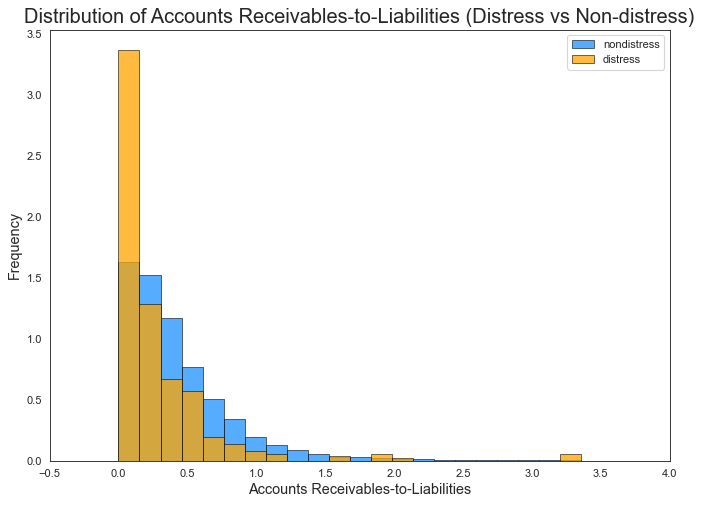

In [256]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'account_receivables_to_liabilities']
x2 = trimmed.loc[trimmed['status']=='distress', 'account_receivables_to_liabilities']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=40)[1] 

# Plot histogram
# stat="density" - Normalize such that the total area of the histogram equals 1
sns.histplot(x1, bins=bins, color="dodgerblue", 
             label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Accounts Receivables-to-Liabilities (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Accounts Receivables-to-Liabilities', size=13) # Setting label of x-axis
plt.xlim(-0.5,4) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/1a_account_receivables_to_liabilities.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Account Receivables-to-Liabilities Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (B) Account Payables-to-Sales

In [155]:
# Summary statistics for 'accounts_payable_to_sales'
trimmed['accounts_payable_to_sales'].describe()

count    10444.000000
mean        14.153783
std         94.308358
min          0.000000
25%          4.205971
50%          7.882412
75%         13.650591
max       8156.799267
Name: accounts_payable_to_sales, dtype: float64

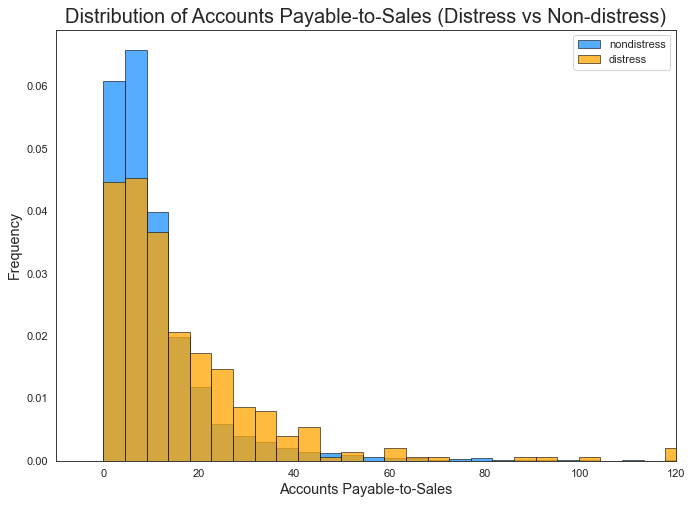

In [259]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'accounts_payable_to_sales']
x2 = trimmed.loc[trimmed['status']=='distress', 'accounts_payable_to_sales']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=1800)[1] 

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Accounts Payable-to-Sales (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Accounts Payable-to-Sales', size=13) # Setting label of x-axis
plt.xlim(-10,120) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/1b_accounts_payable_to_sales.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Accounts Payable-to-Sales Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (C) Asset Turnover

In [161]:
# Summary statistics for 'asset_turnover'
trimmed['asset_turnover'].describe()

count    10444.000000
mean         0.814110
std          0.651404
min          0.000000
25%          0.422396
50%          0.694536
75%          1.049525
max         12.622028
Name: asset_turnover, dtype: float64

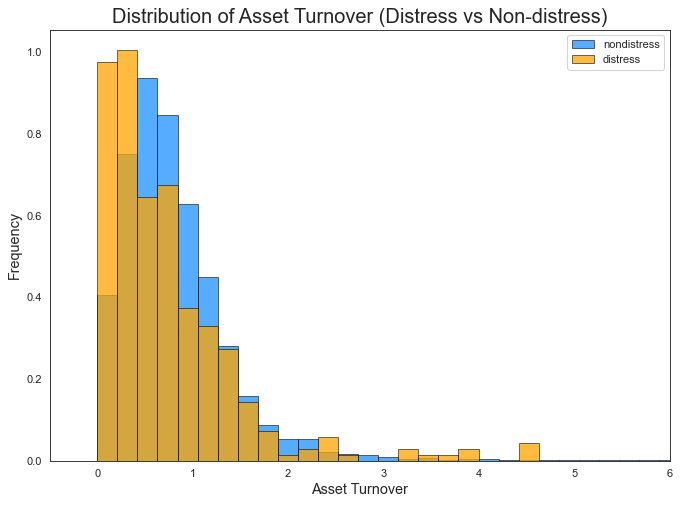

In [261]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'asset_turnover']
x2 = trimmed.loc[trimmed['status']=='distress', 'asset_turnover']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=60)[1] 

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Asset Turnover (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Asset Turnover', size=13) # Setting label of x-axis
plt.xlim(-0.5,6) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/1c_asset_turnover.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **slight separation** between distress and non-distress groups
- Indicates that Asset Turnover Ratio has **some predictive ability** to differentiate between distress and non-distress groups

## (D) Inventory Turnover

In [166]:
# Summary statistics for 'inventory_turnover'
trimmed['inventory_turnover'].describe()

count     10444.000000
mean        627.944054
std       13304.569173
min           0.000000
25%           3.201476
50%           6.005243
75%          14.918024
max      660007.850016
Name: inventory_turnover, dtype: float64

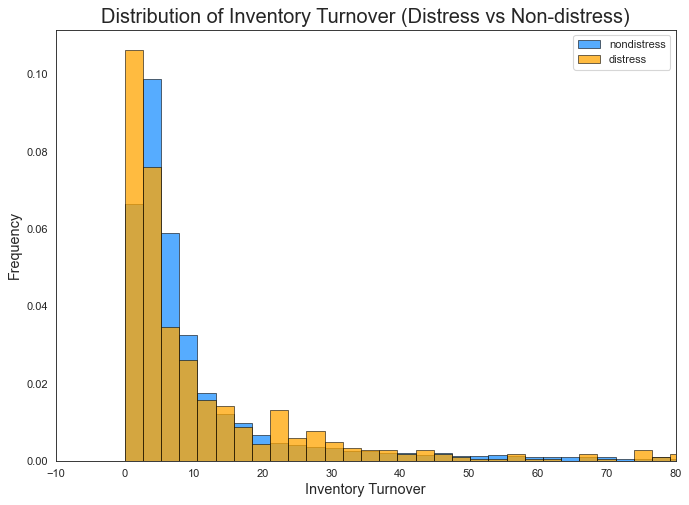

In [253]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = combined_df.loc[combined_df['status']=='nondistress', 'inventory_turnover']
x2 = combined_df.loc[combined_df['status']=='distress', 'inventory_turnover']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=250000)[1] 

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Inventory Turnover (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Inventory Turnover', size=13) # Setting label of x-axis
plt.xlim(-10,80) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/1d_inventory_turnover.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Inventory Turnover Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (E) Sales-to-Account Receivables

In [172]:
# Summary statistics for 'sales_to_account_receivables'
trimmed['sales_to_account_receivables'].describe()

count    10444.000000
mean        29.073421
std        391.756288
min          0.000000
25%          3.724809
50%          5.813030
75%          9.721426
max      20605.627743
Name: sales_to_account_receivables, dtype: float64

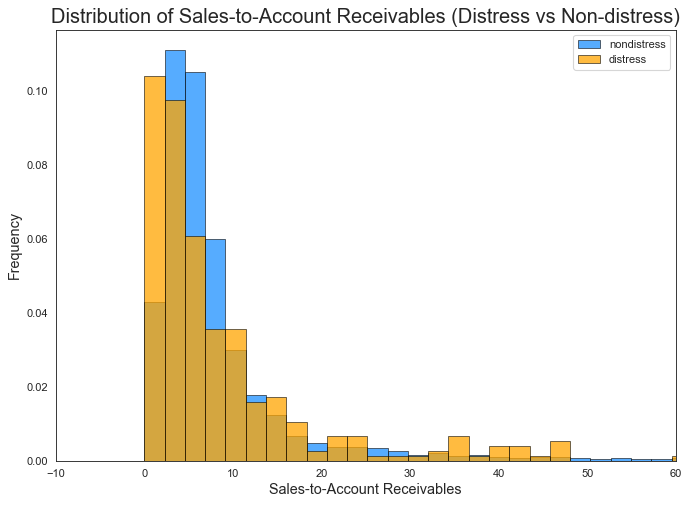

In [258]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'sales_to_account_receivables']
x2 = trimmed.loc[trimmed['status']=='distress', 'sales_to_account_receivables']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=9000)[1] 

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Sales-to-Account Receivables (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Sales-to-Account Receivables', size=13) # Setting label of x-axis
plt.xlim(-10,60) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/1e_sales_to_account_receivables.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Sales-to-Account Receivables Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

# 2. Leverage Ratios

## (A) Debt-to-Asset Ratio

In [174]:
# Summary statistics for 'debt_to_asset'
trimmed['debt_to_asset'].describe()

count    10444.000000
mean         0.211621
std          0.179595
min          0.000000
25%          0.063334
50%          0.182114
75%          0.324258
max          2.768655
Name: debt_to_asset, dtype: float64

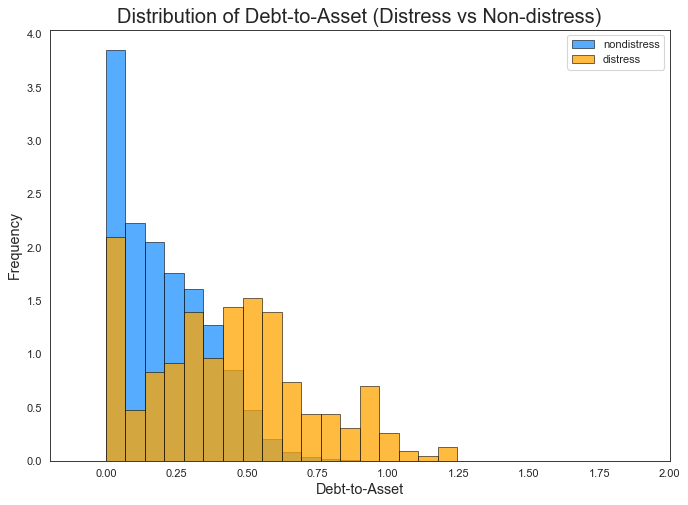

In [251]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'debt_to_asset']
x2 = trimmed.loc[trimmed['status']=='distress', 'debt_to_asset']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=40)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Debt-to-Asset (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Debt-to-Asset', size=13) # Setting label of x-axis
plt.xlim(-0.2,2) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/2a_debt_to_asset.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **apparent separation** between distress and non-distress groups
- Indicates that Debt-to-Asset Ratio has **high predictive ability** to differentiate between distress and non-distress groups

## (B) Debt-to-EBITDA Ratio

In [181]:
# Summary statistics for 'debt_to_ebitda'
trimmed['debt_to_ebitda'].describe()

count     10444.000000
mean         48.151242
std        3517.880516
min       -7706.873810
25%           0.062891
50%           1.441824
75%           4.375242
max      289991.364585
Name: debt_to_ebitda, dtype: float64

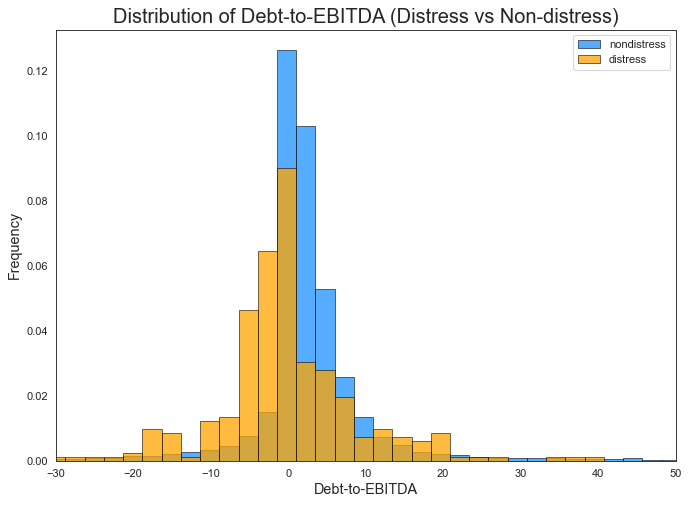

In [250]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'debt_to_ebitda']
x2 = trimmed.loc[trimmed['status']=='distress', 'debt_to_ebitda']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=120000)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Debt-to-EBITDA (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Debt-to-EBITDA', size=13) # Setting label of x-axis
plt.xlim(-30,50) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/2b_debt_to_ebitda.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **slight separation** between distress and non-distress groups
- Indicates that Debt-to-EBITDA Ratio has **some predictive ability** to differentiate between distress and non-distress groups

## (C) EBITDA-to-Interest Expense

In [189]:
# Summary statistics for 'ebitda_to_interest_expense'
trimmed['ebitda_to_interest_expense'].describe()

count     10444.000000
mean        271.591789
std        6203.252437
min      -46588.297891
25%           0.863719
50%           7.660720
75%          29.447434
max      425296.994656
Name: ebitda_to_interest_expense, dtype: float64

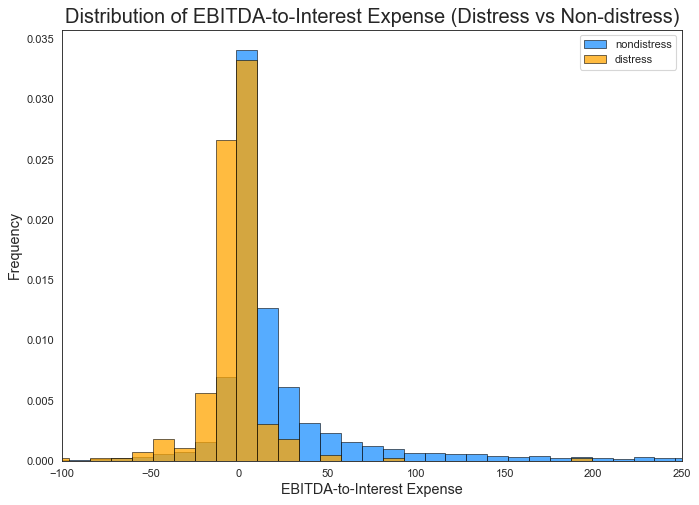

In [257]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'ebitda_to_interest_expense']
x2 = trimmed.loc[trimmed['status']=='distress', 'ebitda_to_interest_expense']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=40000)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of EBITDA-to-Interest Expense (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('EBITDA-to-Interest Expense', size=13) # Setting label of x-axis
plt.xlim(-100,250) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/2c_ebitda_to_interest_expense.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **slight separation** between distress and non-distress groups
- Indicates that EBITDA-to-Interest Expense Ratio has **some predictive ability** to differentiate between distress and non-distress groups

## (D) Long Term Debt-to-Assets

In [188]:
# Summary statistics for 'long_term_debt_to_assets'
trimmed['long_term_debt_to_assets'].describe()

count    10444.000000
mean         0.146573
std          5.402513
min          0.000000
25%          0.005169
50%          0.042616
75%          0.132386
max        552.036576
Name: long_term_debt_to_assets, dtype: float64

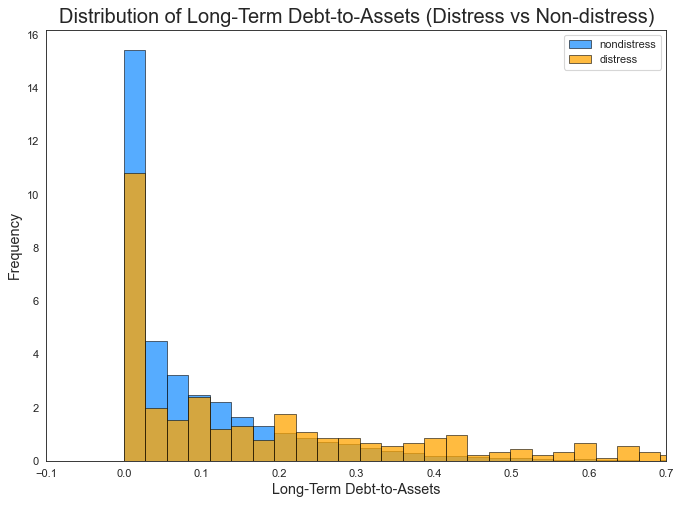

In [156]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'long_term_debt_to_assets']
x2 = trimmed.loc[trimmed['status']=='distress', 'long_term_debt_to_assets']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=100)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Long-Term Debt-to-Assets (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Long-Term Debt-to-Assets', size=13) # Setting label of x-axis
plt.xlim(-0.1,0.7) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/2d_long_term_debt_to_assets.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Long-Term Debt-to-Assets Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (E) Times Interest Earned Ratio

In [187]:
# Summary statistics for 'times_interest_earned'
trimmed['times_interest_earned'].describe()

count     10444.000000
mean        162.993344
std        6201.819326
min     -360749.053293
25%          -1.763523
50%           3.261752
75%          17.063074
max      393780.882458
Name: times_interest_earned, dtype: float64

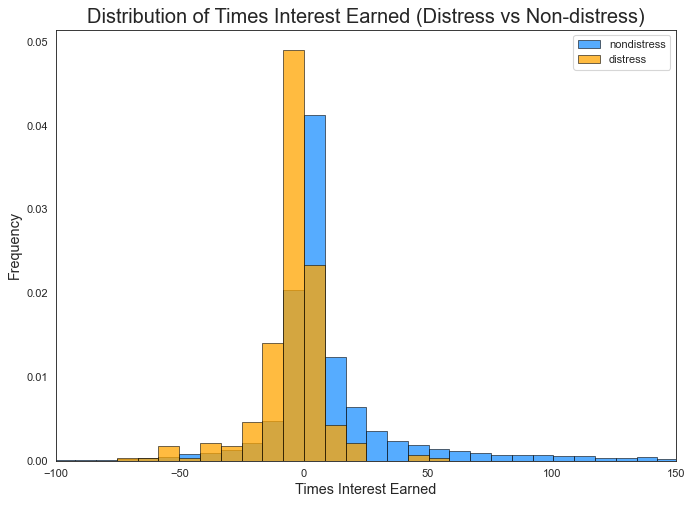

In [245]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'times_interest_earned']
x2 = trimmed.loc[trimmed['status']=='distress', 'times_interest_earned']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=90000)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Times Interest Earned (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Times Interest Earned', size=13) # Setting label of x-axis
plt.xlim(-100,150) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/2e_times_interest_earned.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **slight separation** between distress and non-distress groups
- Indicates that Times Interest Earned Ratio has **some predictive ability** to differentiate between distress and non-distress groups

# 3. Liquidity Ratios

## (A) Cash Conversion Cycle

In [186]:
# Summary statistics for 'cash_conversion_cycle'
trimmed['cash_conversion_cycle'].describe()

count    10444.000000
mean       153.651420
std        963.266172
min     -78924.426229
25%         57.105763
50%        105.568905
75%        181.431082
max      36225.450826
Name: cash_conversion_cycle, dtype: float64

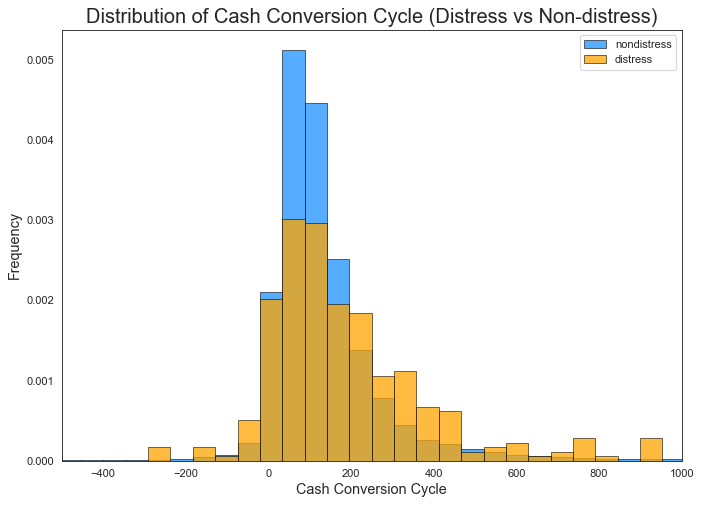

In [249]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'cash_conversion_cycle']
x2 = trimmed.loc[trimmed['status']=='distress', 'cash_conversion_cycle']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=3500)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Cash Conversion Cycle (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Cash Conversion Cycle', size=13) # Setting label of x-axis
plt.xlim(-500,1000) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/3a_cash_conversion_cycle.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Cash Conversion Cycle Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (B) Cash Flow-to-Sales Ratio

In [185]:
# Summary statistics for 'cash_flow_to_sales'
trimmed['cash_flow_to_sales'].describe()

count    10444.000000
mean        -0.016382
std          2.663522
min       -151.308460
25%         -0.008292
50%          0.075068
75%          0.163790
max          3.982969
Name: cash_flow_to_sales, dtype: float64

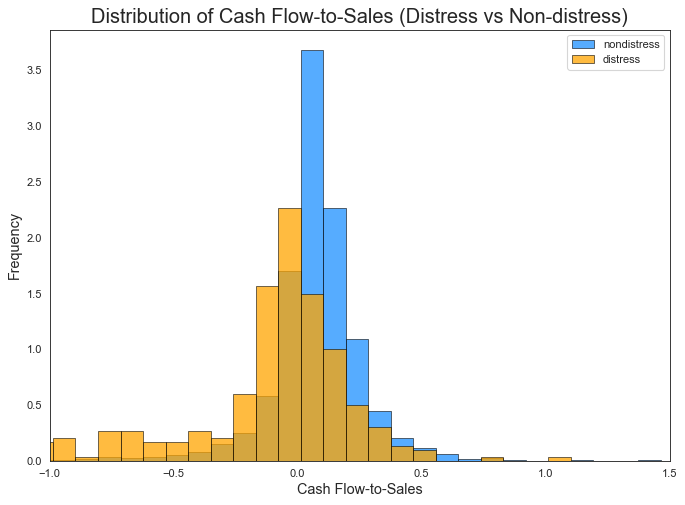

In [247]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'cash_flow_to_sales']
x2 = trimmed.loc[trimmed['status']=='distress', 'cash_flow_to_sales']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=1800)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Cash Flow-to-Sales (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Cash Flow-to-Sales', size=13) # Setting label of x-axis
plt.xlim(-1,1.5) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/3b_cash_flow_to_sales.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **slight separation** between distress and non-distress groups
- Indicates that Cash Flow-to-Sales Ratio has **some predictive ability** to differentiate between distress and non-distress groups

## (C) Cash Ratio 

In [196]:
# Summary statistics for 'cash_ratio'
trimmed['cash_ratio'].describe().apply("{0:.5f}".format)

count       10444.00000
mean         4002.66226
std        288936.78347
min             0.00031
25%             0.25749
50%             0.61895
75%             1.44286
max      20880550.75250
Name: cash_ratio, dtype: object

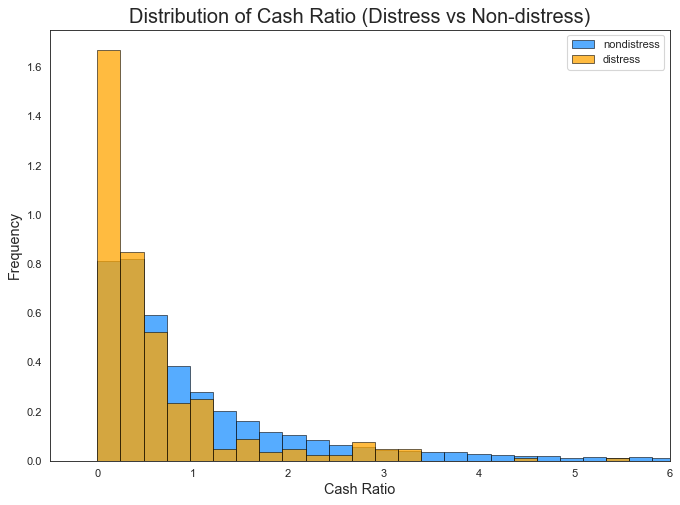

In [233]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'cash_ratio']
x2 = trimmed.loc[trimmed['status']=='distress', 'cash_ratio']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=800)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Cash Ratio (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Cash Ratio', size=13) # Setting label of x-axis

plt.xlim(-0.5,6) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/3c_cash_ratio.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Cash Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (D) Current Ratio

In [197]:
# Summary statistics for 'current_ratio'
trimmed['current_ratio'].describe().apply("{0:.5f}".format)

count       10444.00000
mean         4038.56098
std        291436.83396
min             0.00202
25%             1.09757
50%             1.67135
75%             2.90782
max      21061222.72500
Name: current_ratio, dtype: object

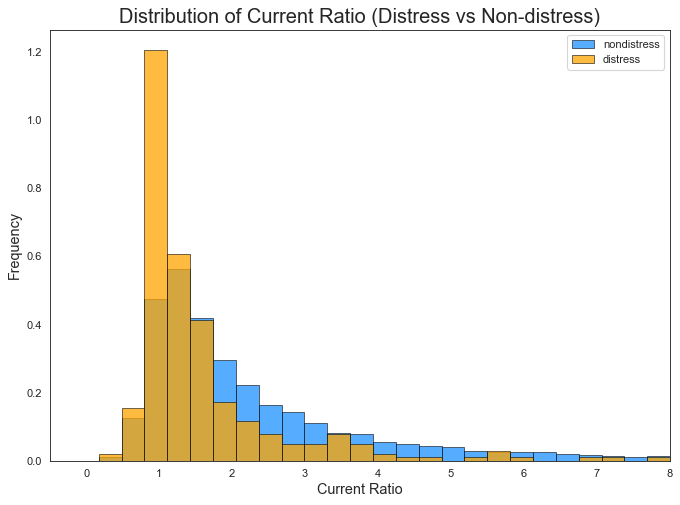

In [242]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'current_ratio']
x2 = trimmed.loc[trimmed['status']=='distress', 'current_ratio']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=850)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k') 

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Current Ratio (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Current Ratio', size=13) # Setting label of x-axis
plt.xlim(-0.5,8) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/3d_current_ratio.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Current Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (E) Working Capital over Total Assets

In [173]:
# Summary statistics for 'working_capital_over_total_assets'
trimmed['working_capital_over_total_assets'].describe()

count    10444.000000
mean         0.156929
std          4.133074
min       -419.068710
25%          0.034329
50%          0.198385
75%          0.390542
max          1.000000
Name: working_capital_over_total_assets, dtype: float64

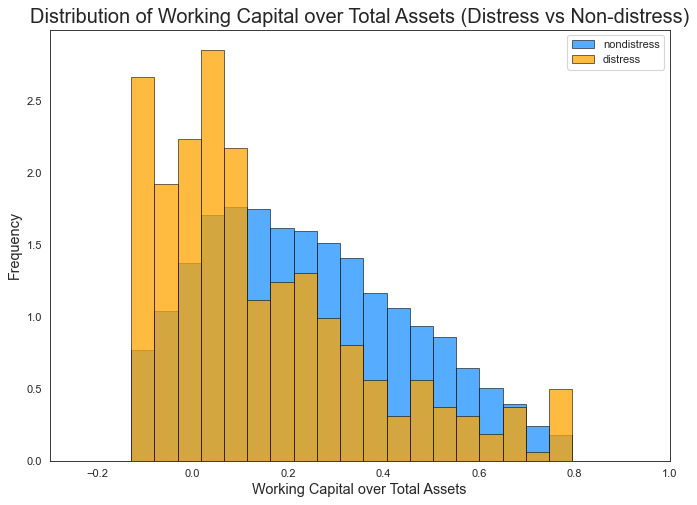

In [241]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'working_capital_over_total_assets']
x2 = trimmed.loc[trimmed['status']=='distress', 'working_capital_over_total_assets']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=19)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Working Capital over Total Assets (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Working Capital over Total Assets', size=13) # Setting label of x-axis
plt.xlim(-0.3,1) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/3e_working_capital_over_total_assets.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **slight separation** between distress and non-distress groups
- Indicates that Working Capital over Total Assets Ratio has **some predictive ability** to differentiate between distress and non-distress groups

# 4. Profitability Ratios

## (A) EBITDA-to-Assets

In [169]:
# Summary statistics for 'ebitda_to_assets'
trimmed['ebitda_to_assets'].describe()

count    10444.000000
mean         0.054561
std          0.120603
min         -3.569935
25%          0.014919
50%          0.058122
75%          0.104522
max          1.115995
Name: ebitda_to_assets, dtype: float64

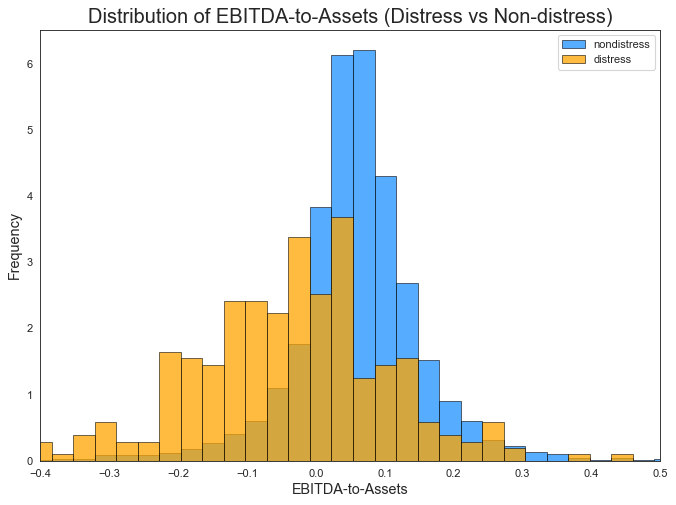

In [213]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'ebitda_to_assets']
x2 = trimmed.loc[trimmed['status']=='distress', 'ebitda_to_assets']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=150)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of EBITDA-to-Assets (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('EBITDA-to-Assets', size=13) # Setting label of x-axis
plt.xlim(-0.4,0.5) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/4a_ebitda_to_assets.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **slight separation** between distress and non-distress groups
- Indicates that EBITDA-to-Assets Ratio has **some predictive ability** to differentiate between distress and non-distress groups

## (B) EBIT-to-Assets

In [171]:
# Summary statistics for 'ebit_to_assets'
trimmed['ebit_to_assets'].describe()

count    10444.000000
mean         0.020603
std          0.117700
min         -3.589609
25%         -0.011243
50%          0.027674
75%          0.067941
max          1.052821
Name: ebit_to_assets, dtype: float64

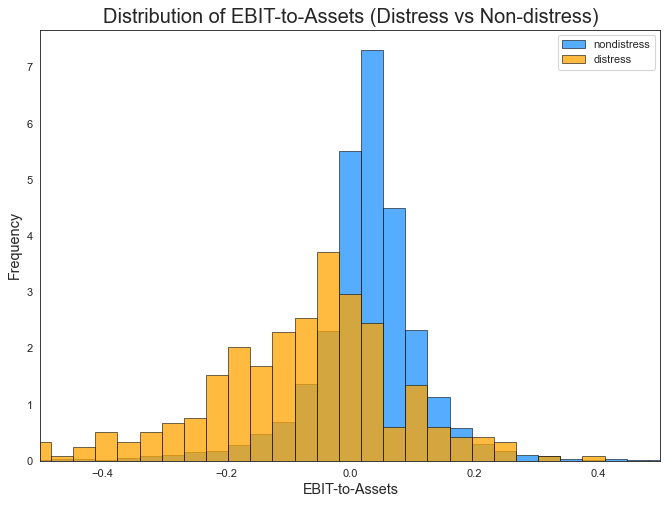

In [244]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'ebit_to_assets']
x2 = trimmed.loc[trimmed['status']=='distress', 'ebit_to_assets']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=130)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of EBIT-to-Assets (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('EBIT-to-Assets', size=13) # Setting label of x-axis
plt.xlim(-0.5,0.5) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/4b_ebit_to_assets.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **slight separation** between distress and non-distress groups
- Indicates that EBIT-to-Assets Ratio has **some predictive ability** to differentiate between distress and non-distress groups

## (C) Operating Margin

In [173]:
# Summary statistics for 'operating_margin'
trimmed['operating_margin'].describe()

count    10444.000000
mean       -11.946477
std        276.331654
min     -12660.277889
25%         -2.019850
50%          3.815569
75%         10.117522
max        130.206466
Name: operating_margin, dtype: float64

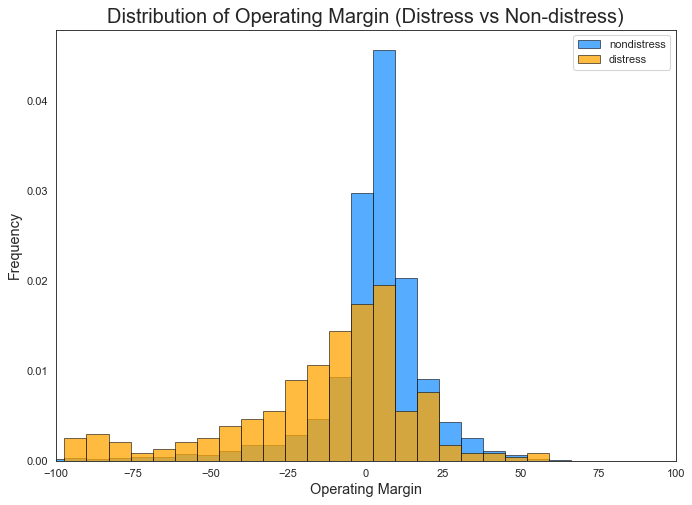

In [226]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'operating_margin']
x2 = trimmed.loc[trimmed['status']=='distress', 'operating_margin']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=1800)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')
# edgecolor='k'

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Operating Margin (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Operating Margin', size=13) # Setting label of x-axis
plt.xlim(-100,100) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/4c_operating_margin.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Operating Margin Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (D) Profit Margin

In [175]:
# Summary statistics for 'net_income_margin'
trimmed['net_income_margin'].describe()

count    10444.000000
mean       -11.956101
std        413.274389
min     -14292.592593
25%         -2.598078
50%          3.036972
75%          8.922838
max      23465.595456
Name: net_income_margin, dtype: float64

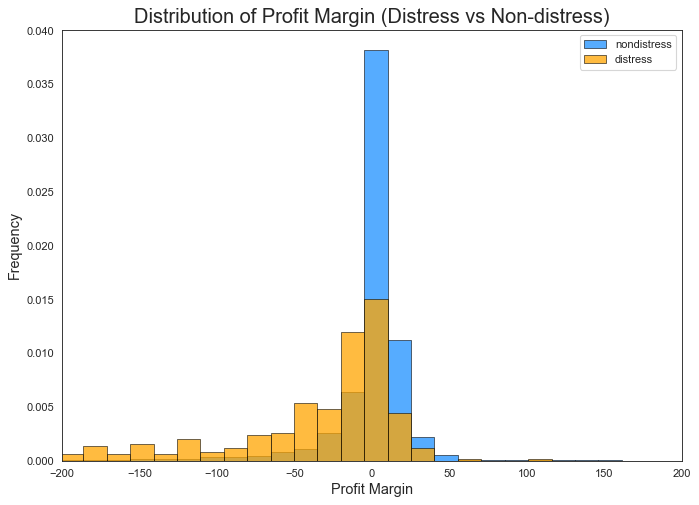

In [225]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'net_income_margin']
x2 = trimmed.loc[trimmed['status']=='distress', 'net_income_margin']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=2500)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Profit Margin (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Profit Margin', size=13) # Setting label of x-axis
plt.xlim(-200,200) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/4d_net_income_margin.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Profit Margin Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (E) Return on Assets

In [177]:
# Summary statistics for 'return_on_assets'
trimmed['return_on_assets'].describe()

count    10444.000000
mean         0.954612
std         13.231869
min       -273.233061
25%         -1.646340
50%          2.320287
75%          6.217945
max        113.553327
Name: return_on_assets, dtype: float64

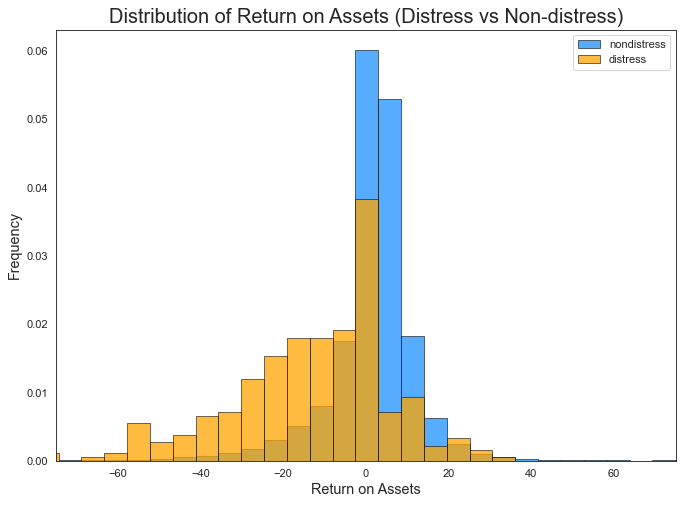

In [224]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'return_on_assets']
x2 = trimmed.loc[trimmed['status']=='distress', 'return_on_assets']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=70)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Return on Assets (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Return on Assets', size=13) # Setting label of x-axis
plt.xlim(-75,75) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/4e_return_on_assets.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **slight separation** between distress and non-distress groups
- Indicates that Return on Assets Ratio has **some predictive ability** to differentiate between distress and non-distress groups

# 5. Valuation Ratios

## (A) Dividend Yield Ratio

In [179]:
# Summary statistics for 'dividend_yield_ratio'
trimmed['dividend_yield_ratio'].describe()

count    10444.000000
mean         1.679341
std          4.758411
min          0.000000
25%          0.000000
50%          0.304513
75%          2.211014
max        278.140845
Name: dividend_yield_ratio, dtype: float64

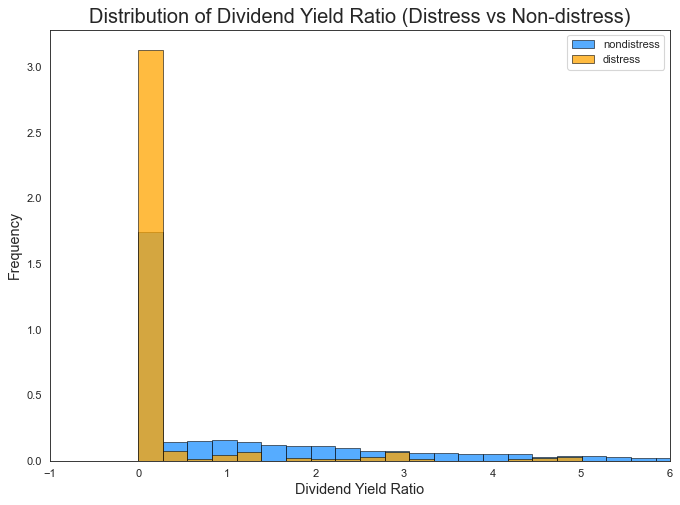

In [198]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'dividend_yield_ratio']
x2 = trimmed.loc[trimmed['status']=='distress', 'dividend_yield_ratio']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=1000)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Dividend Yield Ratio (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Dividend Yield Ratio', size=13) # Setting label of x-axis
plt.xlim(-1,6) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/5a_dividend_yield_ratio.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Dividend Yield Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (B) Market Capitalisation-to-Debt

In [181]:
# Summary statistics for 'market_capitalisation_to_debt'
trimmed['market_capitalisation_to_debt'].describe().apply("{0:.5f}".format)

count      10444.00000
mean         627.01670
std        38672.87492
min            0.00124
25%            1.30840
50%            4.04910
75%           16.34407
max      3791167.09227
Name: market_capitalisation_to_debt, dtype: object

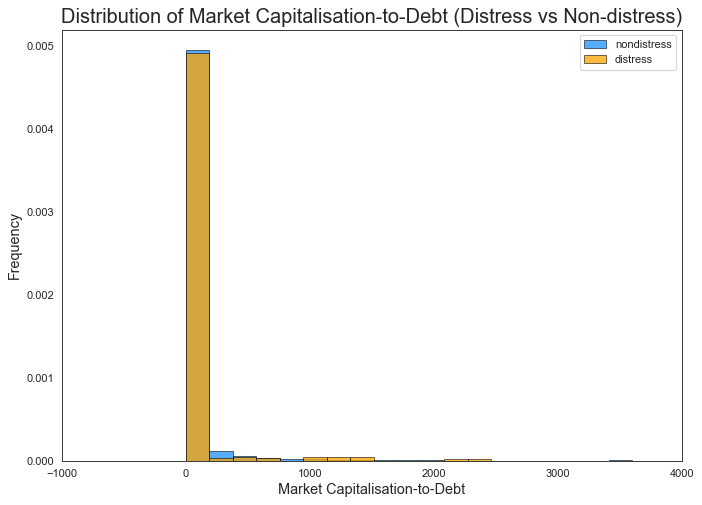

In [220]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'market_capitalisation_to_debt']
x2 = trimmed.loc[trimmed['status']=='distress', 'market_capitalisation_to_debt']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=20000)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Market Capitalisation-to-Debt (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Market Capitalisation-to-Debt', size=13) # Setting label of x-axis
plt.xlim(-1000,4000) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/5b_market_capitalisation_to_debt.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Market Capitalisation-to-Debt Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (C) Price-to-Book Ratio

In [183]:
# Summary statistics for 'price_to_book'
trimmed['price_to_book'].describe()

count    10444.000000
mean         2.015630
std          4.218187
min          0.002255
25%          0.587051
50%          1.115801
75%          2.202599
max        189.855072
Name: price_to_book, dtype: float64

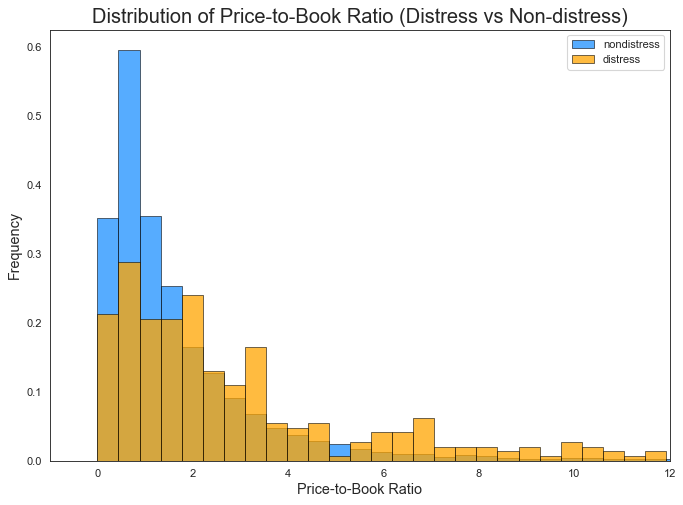

In [209]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'price_to_book']
x2 = trimmed.loc[trimmed['status']=='distress', 'price_to_book']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=430)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Price-to-Book Ratio (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Price-to-Book Ratio', size=13) # Setting label of x-axis
plt.xlim(-1,12) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/5c_price_to_book.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Price-to-Book Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (D) Price-to-Earnings Ratio

In [185]:
# Summary statistics for 'price_to_earnings'
trimmed['price_to_earnings'].describe()

count    10444.000000
mean        70.882493
std        415.963971
min          0.027557
25%          8.927020
50%         17.242991
75%         39.942038
max      10227.734295
Name: price_to_earnings, dtype: float64

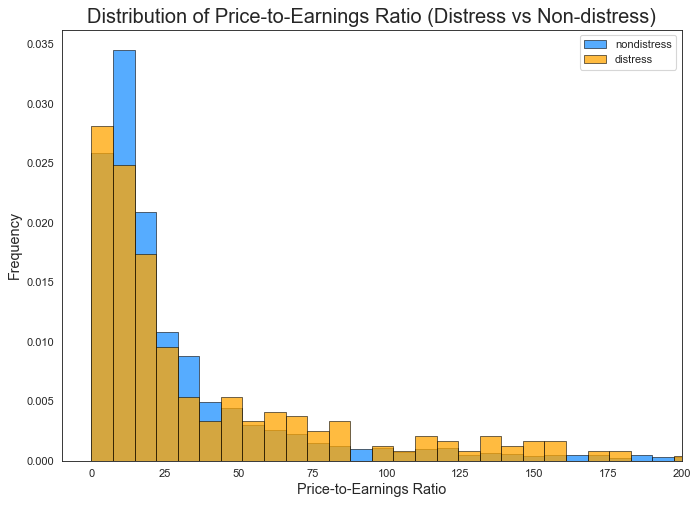

In [223]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'price_to_earnings']
x2 = trimmed.loc[trimmed['status']=='distress', 'price_to_earnings']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=1400)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Price-to-Earnings Ratio (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Price-to-Earnings Ratio', size=13) # Setting label of x-axis
plt.xlim(-10,200) # Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/5d_price_to_earnings.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Price-to-Earnings Ratio has **weak predictive ability** to differentiate between distress and non-distress groups

## (E) Price-to-Sales Ratio

In [187]:
# Summary statistics for 'price_to_sales'
trimmed['price_to_sales'].describe()

count    10444.000000
mean         4.230275
std         39.501803
min          0.000198
25%          0.416886
50%          0.929960
75%          2.169354
max       1649.667584
Name: price_to_sales, dtype: float64

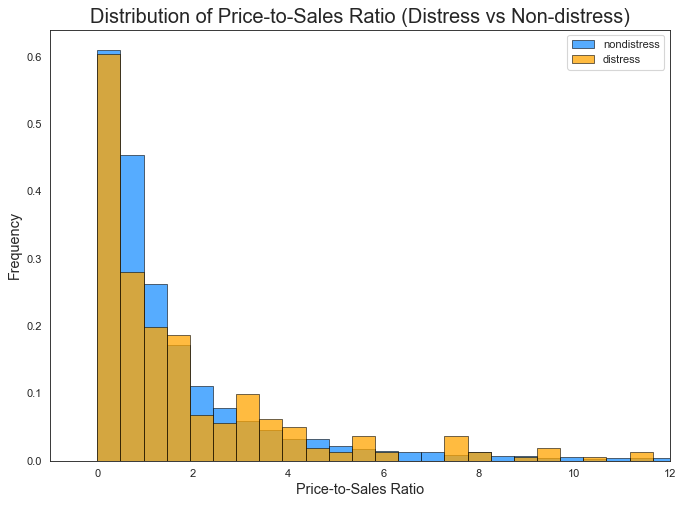

In [219]:
sns.set_style("white")

# Set figure size
plt.figure(figsize=(10,7), dpi= 80)

# Set x1 and x2
x1 = trimmed.loc[trimmed['status']=='nondistress', 'price_to_sales']
x2 = trimmed.loc[trimmed['status']=='distress', 'price_to_sales']

# Get the bin edges
a = x1.values
b = x2.values
bins = np.histogram(np.hstack((a,b)), bins=3400)[1]

# Plot histogram
sns.histplot(x1, bins=bins, color="dodgerblue", label="nondistress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

sns.histplot(x2, bins=bins, color="orange", label="distress",
             kde=False, linewidth=0.5, stat="density", edgecolor='k')

# Graph formatting
plt.title('Distribution of Price-to-Sales Ratio (Distress vs Non-distress)', size=18) # Setting plot title
plt.ylabel('Frequency', size=13) # Setting label of y-axis
plt.xlabel('Price-to-Sales Ratio', size=13) # Setting label of x-axis
plt.xlim(-1,12) #. Setting axis range
plt.legend() # Adding legend
plt.savefig('./files/images/univariate_analysis/5e_price_to_sales.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

**Observations**:
- There is **evident overlap** between distress and non-distress groups
- Indicates that Price-to-Sales Ratio has **weak predictive ability** to differentiate between distress and non-distress groups